In [68]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [69]:
import opendatasets as od
train_tweets = od.download("https://www.kaggle.com/vkrahul/twitter-hate-speech?select=train_E6oV3lV.csv")

Skipping, found downloaded files in "./twitter-hate-speech" (use force=True to force download)


In [166]:
#import the required libraries
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup

def review_to_words(review):
    '''Function that takes in the word and remove html parser and other symbols.
    Args: review, the sentence in the string format
    returns: cleansed text'''
    text = BeautifulSoup(review, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    return text

def read_csv(file_path):
    '''Function that takes in the file and returns in the format cleaned and ready for feature learning
    Args: csv file
    returns: datarfame'''
    df = pd.read_csv(file_path)          #read in the file
    df = df.drop(['id'], axis=1)         #drop the unecessary columns
    df['tweet'] = df['tweet'].apply(lambda x:review_to_words(x))   #apply the above funtion to preporcess the word
    df = df[['tweet','label']]            #rearrange the columns
    return df       #returns dataframe

#Now, specify the path that file located
path = r'twitter-hate-speech/train_E6oV3lV.csv'

#apply the function and view the dataframe
df = read_csv(path)
df.head(10)


,tweet,label
0,user when a father is dysfunctional and is s...,0
1,user user thanks for lyft credit i can t us...,0
2,bihday your majesty,0
3,model i love u take with u all the time in ...,0
4,factsguide society now motivation,0
5,2 2 huge fan fare and big talking before the...,0
6,user camping tomorrow user user user use...,0
7,the next school year is the year for exams ...,0
8,we won love the land allin cavs champ...,0
9,user user welcome here i m it s so gr...,0


The above dataframe tells us, it is preprocessed properly and ready for feature learning.

In [71]:
df.describe()

,label
count,31962.000000
mean,0.070146
std,0.255397
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [72]:
#Code for removing mistake words
replace_words = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary

#we will pass a sentence to test our function
sentence = "I luv myself"
words = sentence.split()    #split the sentence into words

#replace the words in the sentence with the word in the dictionary if the the actual word itself.
reformed = [replace_words[word] if word in replace_words else word for word in words]
reformed = " ".join(reformed)    #join the splitted after reforming
print(reformed)     #print the reformed

I love myself


In [73]:
#apply the function on df['tweet']
df['tweet'] = df['tweet'].apply(lambda x : ' '.join(replace_words[word] if word in replace_words else word for word in x.split()))

#disply the reformed
df.head()

,tweet,label
0,user when a father is dysfunctional and is so ...,0
1,user user thanks for lyft credit i can t use c...,0
2,bihday your majesty,0
3,model i love u take with u all the time in ur,0
4,factsguide society now motivation,0


In [74]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Normal words


(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

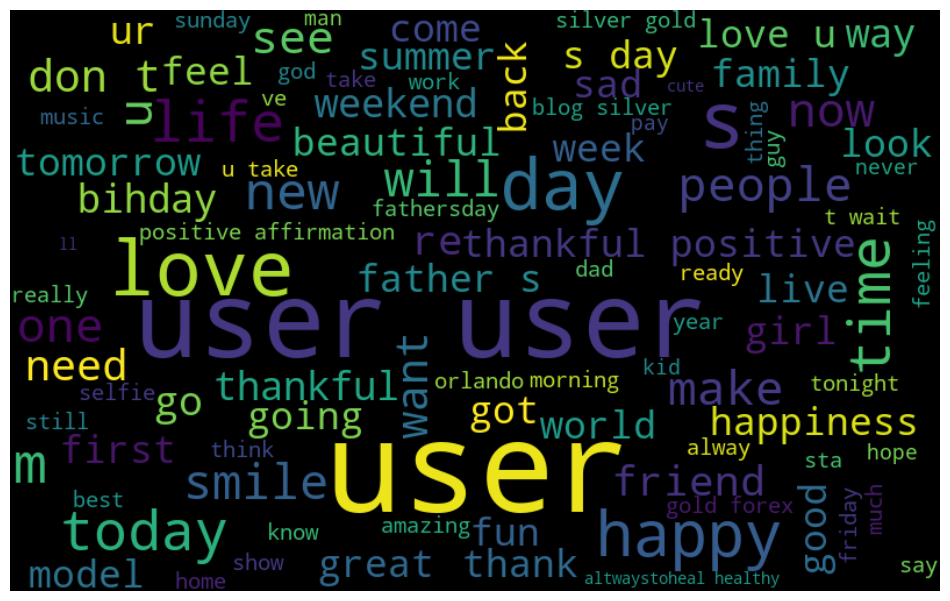

In [75]:
#Import the libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#take all words in df['tweet'] with the labels 0 for visualization
normal_words = ' '.join([word for word in df['tweet'][df['label'] == 0]])
#set the wordcloud parameters
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
#plot the graph
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

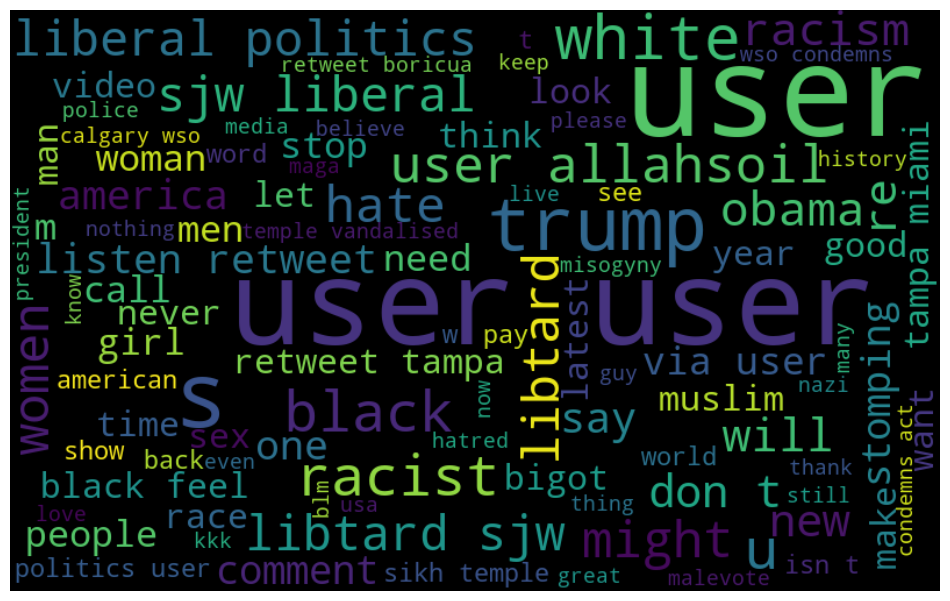

In [76]:
#take all words in df['tweet'] with the labels 1 for visualization
normal_words = ' '.join([word for word in df['tweet'][df['label'] == 1]])
#set the wordcloud parameters
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
#plot the figure
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [77]:
#replace the word user with empty space
df['tweet'] = df['tweet'].apply(lambda x: x.replace('user',''))

#print the dataframe
df.head()

,tweet,label
0,when a father is dysfunctional and is so self...,0
1,thanks for lyft credit i can t use cause the...,0
2,bihday your majesty,0
3,model i love u take with u all the time in ur,0
4,factsguide society now motivation,0


label
0    29720
1     2242
Name: count, dtype: int64


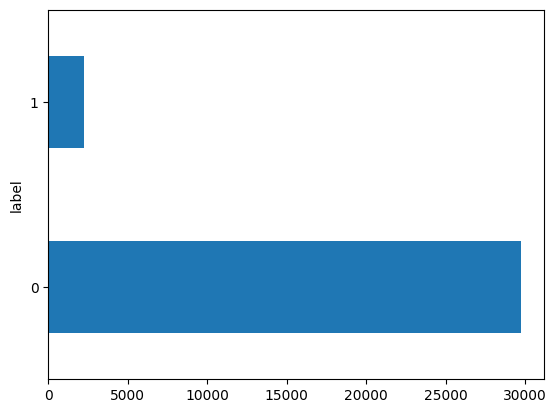

In [78]:
df.label.value_counts().plot(kind='barh')   #bar plot with value counts for each labels
print(df.label.value_counts()) #print it the numbers as well

In [79]:
#print the shape and null counts of the dataframe

print("Shape: ", df.shape)
print("Label null values count: ", df['label'].isna().sum())
print("Tweets null values count: ", df['tweet'].isna().sum())

Shape:  (31962, 2)
Label null values count:  0
Tweets null values count:  0


In [80]:
#divide the dataframe with each class labels
df_positive = df[df['label']==0]
df_negative = df[df['label']==1]

#sample only 2500 out of all from the label 0
df_positive = df_positive.sample(2500)

# append the df with label 1 with label 0  (replaced .append -> pd.concat)
df_positive = pd.concat([df_positive, df_negative], ignore_index=True)

#Shuffle the df
from sklearn.utils import shuffle
df = shuffle(df_positive)

#reset the index
df = df.reset_index(drop=True)
df.head()

,tweet,label
0,awesome supps from mostly empty tubs enjoying...,0
1,allahsoil why build walls when there are alre...,1
2,it s official hate breeds hate prejudice pare...,1
3,carolyn cooper ugly poor ignorant and black,1
4,you don t think that the very fact there is ...,0


In [81]:
#print the label counts and see how many are there

print("The label counts: ", df.label.value_counts())

The label counts:  label
0    2500
1    2242
Name: count, dtype: int64


In [82]:
# we will write this file into the csv file and can read it later to save memory
df.to_csv('train/df.csv')
del df

In [83]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install torchtext --no-cache-dir

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install spacy --no-cache-dir

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [86]:
#Downloading the spacy tokenizer english library before executing the build_vocab function, helps in building the tokenizer.
#Otherwise, the function build_vocab will throw an error.
import spacy    
from spacy.cli.download import download
download('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/12.8 MB ? eta -:--:--  Downloading https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.5 MB/s  0:00:03 eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.5 MB/s  0:00:03 eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this

In [87]:
#Load the library
spacy.load('en_core_web_sm')

In [ ]:

from collections import Counter
from types import SimpleNamespace
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import spacy, torch, pandas as pd

# load spaCy tokenizer (ensure you ran the spacy model download earlier)
nlp = spacy.load('en_core_web_sm')

class SimpleTweetsDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = list(texts)
        self.labels = list(labels)
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        return self.texts[idx], int(self.labels[idx])

def build_simple_vocab(texts, min_freq=3, max_vocab=20000):
    ctr = Counter()
    for t in texts:
        for tok in nlp(t):
            ctr[tok.text] += 1
    common = [w for w,f in ctr.most_common(max_vocab) if f >= min_freq]
    itos = ['<pad>', '<unk>'] + common
    stoi = {w:i for i,w in enumerate(itos)}
    return stoi, itos

def collate_fn_factory(stoi, pad_idx=0, unk_idx=1, max_len=512):
    def collate(batch):
        texts, labels = zip(*batch)
        tokenized = [[tok.text for tok in nlp(t)] for t in texts]
        indexed = [[stoi.get(w, unk_idx) for w in toks][:max_len] for toks in tokenized]
        lengths = [len(x) for x in indexed]
        maxl = max(lengths) if lengths else 0
        padded = torch.full((len(indexed), maxl), pad_idx, dtype=torch.long)
        for i, seq in enumerate(indexed):
            padded[i, :len(seq)] = torch.tensor(seq, dtype=torch.long)
        labels_t = torch.tensor(labels, dtype=torch.long)
        batch_obj = SimpleNamespace()
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        batch_obj.tweet = (padded.to(device), torch.tensor(lengths, dtype=torch.long).to(device))
        batch_obj.label = labels_t.to(device)
        return batch_obj
    return collate

def build_vocab(file_path, batch_size=64, min_freq=3, max_vocab=20000, max_len=512, test_size=0.3, random_state=2019):
    # load preprocessed df (expects columns 'tweet' and 'label')
    df_local = pd.read_csv(file_path)
    if 'Unnamed: 0' in df_local.columns:
        df_local = df_local.drop(columns=['Unnamed: 0'])
    texts = df_local['tweet'].astype(str)
    labels = df_local['label'].astype(int)
    X_train, X_val, y_train, y_val = train_test_split(texts, labels, test_size=test_size, stratify=labels, random_state=random_state)
    stoi, itos = build_simple_vocab(X_train, min_freq=min_freq, max_vocab=max_vocab)
    pad_idx = stoi.get('<pad>', 0)
    unk_idx = stoi.get('<unk>', 1)
    collate = collate_fn_factory(stoi, pad_idx=pad_idx, unk_idx=unk_idx, max_len=max_len)
    train_ds = SimpleTweetsDataset(X_train, y_train)
    val_ds = SimpleTweetsDataset(X_val, y_val)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, collate_fn=collate)
    len_text_vocab = len(stoi)
    word_dict = stoi
    GLOBAL_WORD_DICT = word_dict     # save your vocab globally
    return train_loader, val_loader, len_text_vocab, word_dict




We will provide the above function with path and in turn get the iterators and word dict.

In [118]:
#defining the path of the file
path = 'train/df.csv'

#assigining it to a function to get iterators
train_it, test_it, len_text_vocab, word_dict = build_vocab(path)

In [119]:
#get the number of batches in each of the iterators

print(f'- nr. of training examples {len(train_it)}')
print(f'- nr. of testing examples {len(test_it)}')

- nr. of training examples 52
- nr. of testing examples 23


In [91]:
#Import libraries
import torch
from torch import nn
import torch.nn.functional as F

import random, math, sys

#set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Basic self attention model
class SelfAttention(nn.Module):
    """
    Basic Self Attention module, Heart of transormer
    Args: nn.Module from Pytorch
    """

    def __init__(self, emb, heads=8, mask=False):
        """
        emb: Embedding dimension
        heads: 8, as in emb are divided on heads and trained parallel
        mask: masking is done on seq-to-seq models, but it is kept here for future model development
        """

        super().__init__()        #inherit the pytorch

        assert emb % heads == 0, f'Embedding dimension ({emb}) should be divisible by nr. of heads ({heads})'

        self.emb = emb       #embedding dimensions
        self.heads = heads   #number of heds to split the job
        self.mask = mask     #masking if needed

        s = emb // heads
        # - We will break the embedding into `heads` chunks and feed each to a different attention head

        self.tokeys    = nn.Linear(emb, emb, bias=False)
        self.toqueries = nn.Linear(emb, emb, bias=False)
        self.tovalues  = nn.Linear(emb, emb, bias=False)

        self.unifyheads = nn.Linear(emb, emb)

    def forward(self, x):

        b, t, e = x.size()
        h = self.heads
        assert e == self.emb, f'Input embedding dim ({e}) should match layer embedding dim ({self.emb})'

        s = e // h

        keys    = self.tokeys(x)
        queries = self.toqueries(x)
        values  = self.tovalues(x)

        keys    = keys.view(b, t, h, s)
        queries = queries.view(b, t, h, s)
        values  = values.view(b, t, h, s)

        # -- We first compute the k/q/v's on the whole embedding vectors, and then split into the different heads.
        #    See the following video for an explanation: https://youtu.be/KmAISyVvE1Y

        # Compute scaled dot-product self-attention

        # - fold heads into the batch dimension
        keys = keys.transpose(1, 2).contiguous().view(b * h, t, s)
        queries = queries.transpose(1, 2).contiguous().view(b * h, t, s)
        values = values.transpose(1, 2).contiguous().view(b * h, t, s)

        queries = queries / (e ** (1/4))
        keys    = keys / (e ** (1/4))
        # - Instead of dividing the dot products by sqrt(e), we scale the keys and values.
        #   This should be more memory efficient

        # - get dot product of queries and keys, and scale
        dot = torch.bmm(queries, keys.transpose(1, 2))

        assert dot.size() == (b*h, t, t)

        if self.mask: # mask out the upper half of the dot matrix, excluding the diagonal
            mask_(dot, maskval=float('-inf'), mask_diagonal=False)

        dot = F.softmax(dot, dim=2)
        # - dot now has row-wise self-attention probabilities

        # apply the self attention to the values
        out = torch.bmm(dot, values).view(b, h, t, s)

        # swap h, t back, unify heads
        out = out.transpose(1, 2).contiguous().view(b, t, s * h)

        return self.unifyheads(out)

class TransformerBlock(nn.Module):
    '''Transfomer Block are modules that carry self-attention modules, based on the number of
    blocks needed on the main module, it is build that number of times and the data are fed into the
    each of the blocks and concatenated at the end'''

    def __init__(self, emb, heads, mask, seq_length, ff_hidden_mult=4, dropout=0.0, attention_type='default', pos_embedding=None):
        super().__init__()

        if attention_type == 'default':
            self.attention = SelfAttention(emb, heads=heads, mask=mask)
        self.mask = mask

        self.norm1 = nn.LayerNorm(emb)
        self.norm2 = nn.LayerNorm(emb)

        self.ff = nn.Sequential(

            nn.Linear(emb, ff_hidden_mult * emb),
            nn.ReLU(),
            nn.Linear(ff_hidden_mult * emb, emb)
        )

        self.do = nn.Dropout(dropout)

    def forward(self, x):

        attended = self.attention(x)

        x = self.norm1(attended + x)

        x = self.do(x)

        fedforward = self.ff(x)

        x = self.norm2(fedforward + x)

        x = self.do(x)

        return x

class CTransformer(nn.Module):
    """
    Transformer for classifying sequences
    """

    def __init__(self, emb, heads, depth, seq_length, num_tokens, num_classes, max_pool=True, dropout=0.0, wide=False):
        """
        emb: Embedding dimension
        heads: nr. of attention heads
        depth: Number of transformer blocks
        seq_length: Expected maximum sequence length
        num_tokens: Number of tokens (usually words) in the vocabulary
        num_classes: Number of classes.
        max_pool: If true, use global max pooling in the last layer. If false, use global
                         average pooling.
        """
        super().__init__()

        self.num_tokens, self.max_pool = num_tokens, max_pool

        self.token_embedding = nn.Embedding(embedding_dim=emb, num_embeddings=num_tokens)
        self.pos_embedding = nn.Embedding(embedding_dim=emb, num_embeddings=seq_length)

        tblocks = []
        for i in range(depth):
            tblocks.append(
                TransformerBlock(emb=emb, heads=heads, seq_length=seq_length, mask=False, dropout=dropout))

        self.tblocks = nn.Sequential(*tblocks)

        self.toprobs = nn.Linear(emb, num_classes)

        self.do = nn.Dropout(dropout)



    def forward(self, x):
        """
        x: A batch by sequence length integer tensor of token indices.
        return: predicted log-probability vectors for each token based on the preceding tokens.
        """
        tokens = self.token_embedding(x)
        b, t, e = tokens.size()

        positions = self.pos_embedding(torch.arange(t, device=device))[None, :, :].expand(b, t, e)

        x = tokens + positions
        x = self.do(x)
        x = self.tblocks(x)
        x = x.max(dim=1)[0] if self.max_pool else x.mean(dim=1) # pool over the time dimension
        x = self.toprobs(x)

        return F.log_softmax(x, dim=1)

In [92]:
# defining a function for train loop
def train(train_loader, test_loader, num_epoch, opt):
    '''The function that takes in the iterator, number of epochs and optimizer and return the
    classification loss andaccuracy metrics.
    Args: Train and test iterator, number of epochs, optimzer
    returns: predicted labels, actual labels'''
    seen = 0
    #initialize every epoch
    epoch_loss = 0
    total, correction= 0.0, 0.0

    for e in range(num_epoch):     #in the range of epochs specified
        print(f'\n epoch {e}')     #print the nth of epoch
        #train the model
        model.train(True)
        #load the batch
        for batch in tqdm.tqdm(train_loader):
            opt.zero_grad()
            #specify the input and label
            input = batch.tweet[0]
            label = batch.label
            #send the input tensors to the model
            out = model(input)
            #get the result
            output = out.argmax(dim=1)
            #calculate the loss function
            loss = F.nll_loss(out, label)
            loss.backward()
            opt.step()
            seen += input.size(0)
            #loss and accuracy
            total += float(input.size(0))
            correction += float((label == output).sum().item())
            epoch_loss += loss.item()
            print('classification/train-loss', float(loss.item()), seen)
        accuracy = correction / total
        print(f'-- {"training validation"} accuracy {accuracy*100}')

        with torch.no_grad():

            model.train(False)  #model train not needed
            tot, cor= 0.0, 0.0  #metrics for calculating the accuracy
            collect_pred=[]     #list the collectiong the prediction labels
            collect_label=[]    #list for the actual labels

            for batch in tqdm.tqdm(test_it):

                input = batch.tweet[0]
                label = batch.label
                out = model(input).argmax(dim=1)

                collect_pred.append(out.cpu().detach().numpy())   #append the prediction to the list
                collect_label.append(label.cpu().detach().numpy())  #append the actual label to the list
                tot += float(input.size(0))                         #total from the input
                cor += float((label == out).sum().item())           #the correct ones

            acc = cor / tot    #accuracy
            print(f'-- {"test validation"} accuracy {acc*100}')
    torch.save(model.state_dict(), 'saved_weights2.pt')    #save the model
    print("The model is saved")
    pred, label = list(collect_pred), list(collect_label)  #put the np arrays of prediction and label into the list
    pred, label = np.concatenate(pred, axis=0), np.concatenate(label, axis=0)  #concatenate all the arrays
    return pred, label    #return the prediction and labels for the evaluation
    pass


In [93]:
#setup the hyperparameters:
emb=128
heads=8
depth = 6
seq_length = 512
num_tokens = len_text_vocab
NUM_CLS = 2

#BUild the model
model = CTransformer(emb=emb,
                    heads=heads,
                    depth=depth,
                    seq_length=seq_length,
                    num_tokens=num_tokens,
                    num_classes=NUM_CLS,
                    max_pool=True)
if torch.cuda.is_available():
    model.cuda()
#push to cuda if available
opt = torch.optim.Adam(lr=0.0001, params=model.parameters())

In [94]:
#call the train loop
pred, label = train(train_it,test_it, 20, opt)


 epoch 0


  2%|▏         | 1/52 [00:00<00:20,  2.43it/s]

classification/train-loss 0.7033848762512207 64


  4%|▍         | 2/52 [00:00<00:18,  2.68it/s]

classification/train-loss 0.7192728519439697 128


  6%|▌         | 3/52 [00:01<00:18,  2.71it/s]

classification/train-loss 0.7587649822235107 192


  8%|▊         | 4/52 [00:01<00:18,  2.65it/s]

classification/train-loss 0.6738800406455994 256


 10%|▉         | 5/52 [00:01<00:17,  2.64it/s]

classification/train-loss 0.7035672664642334 320


 12%|█▏        | 6/52 [00:02<00:16,  2.71it/s]

classification/train-loss 0.6554558277130127 384


 13%|█▎        | 7/52 [00:02<00:16,  2.72it/s]

classification/train-loss 0.7112575769424438 448


 15%|█▌        | 8/52 [00:02<00:16,  2.74it/s]

classification/train-loss 0.6521154642105103 512


 17%|█▋        | 9/52 [00:03<00:16,  2.56it/s]

classification/train-loss 0.732726514339447 576


 19%|█▉        | 10/52 [00:03<00:16,  2.53it/s]

classification/train-loss 0.6342763304710388 640


 21%|██        | 11/52 [00:04<00:16,  2.48it/s]

classification/train-loss 0.6920130848884583 704


 23%|██▎       | 12/52 [00:04<00:15,  2.53it/s]

classification/train-loss 0.6746041774749756 768


 25%|██▌       | 13/52 [00:04<00:14,  2.66it/s]

classification/train-loss 0.6684728860855103 832


 27%|██▋       | 14/52 [00:05<00:14,  2.61it/s]

classification/train-loss 0.6963574290275574 896


 29%|██▉       | 15/52 [00:05<00:13,  2.64it/s]

classification/train-loss 0.7211055159568787 960


 31%|███       | 16/52 [00:06<00:13,  2.75it/s]

classification/train-loss 0.6844136714935303 1024


 33%|███▎      | 17/52 [00:06<00:14,  2.47it/s]

classification/train-loss 0.6235572695732117 1088


 35%|███▍      | 18/52 [00:06<00:13,  2.51it/s]

classification/train-loss 0.6434181332588196 1152


 37%|███▋      | 19/52 [00:07<00:13,  2.50it/s]

classification/train-loss 0.6496394276618958 1216


 38%|███▊      | 20/52 [00:07<00:12,  2.51it/s]

classification/train-loss 0.651723325252533 1280


 40%|████      | 21/52 [00:08<00:11,  2.63it/s]

classification/train-loss 0.6523712873458862 1344


 42%|████▏     | 22/52 [00:08<00:11,  2.65it/s]

classification/train-loss 0.666785478591919 1408


 44%|████▍     | 23/52 [00:08<00:10,  2.72it/s]

classification/train-loss 0.642684817314148 1472


 46%|████▌     | 24/52 [00:09<00:10,  2.67it/s]

classification/train-loss 0.634760320186615 1536


 48%|████▊     | 25/52 [00:09<00:10,  2.68it/s]

classification/train-loss 0.6953988075256348 1600


 50%|█████     | 26/52 [00:09<00:09,  2.70it/s]

classification/train-loss 0.6203060150146484 1664


 52%|█████▏    | 27/52 [00:10<00:09,  2.71it/s]

classification/train-loss 0.6135996580123901 1728


 54%|█████▍    | 28/52 [00:10<00:08,  2.79it/s]

classification/train-loss 0.5844394564628601 1792


 56%|█████▌    | 29/52 [00:10<00:08,  2.83it/s]

classification/train-loss 0.6464133858680725 1856


 58%|█████▊    | 30/52 [00:11<00:08,  2.72it/s]

classification/train-loss 0.6837389469146729 1920


 60%|█████▉    | 31/52 [00:11<00:07,  2.73it/s]

classification/train-loss 0.6177625060081482 1984


 62%|██████▏   | 32/52 [00:12<00:07,  2.76it/s]

classification/train-loss 0.6462470889091492 2048


 63%|██████▎   | 33/52 [00:12<00:07,  2.68it/s]

classification/train-loss 0.5808457136154175 2112


 65%|██████▌   | 34/52 [00:12<00:06,  2.61it/s]

classification/train-loss 0.6335745453834534 2176


 67%|██████▋   | 35/52 [00:13<00:06,  2.65it/s]

classification/train-loss 0.6389757990837097 2240


 69%|██████▉   | 36/52 [00:13<00:06,  2.51it/s]

classification/train-loss 0.6411620378494263 2304


 71%|███████   | 37/52 [00:14<00:05,  2.51it/s]

classification/train-loss 0.6420402526855469 2368


 73%|███████▎  | 38/52 [00:14<00:05,  2.52it/s]

classification/train-loss 0.6412949562072754 2432


 75%|███████▌  | 39/52 [00:14<00:05,  2.51it/s]

classification/train-loss 0.6313627362251282 2496


 77%|███████▋  | 40/52 [00:15<00:04,  2.54it/s]

classification/train-loss 0.5889920592308044 2560


 79%|███████▉  | 41/52 [00:15<00:04,  2.43it/s]

classification/train-loss 0.6974786520004272 2624


 81%|████████  | 42/52 [00:16<00:04,  2.49it/s]

classification/train-loss 0.6069716215133667 2688


 83%|████████▎ | 43/52 [00:16<00:03,  2.48it/s]

classification/train-loss 0.6029986143112183 2752


 85%|████████▍ | 44/52 [00:16<00:03,  2.54it/s]

classification/train-loss 0.6423195600509644 2816


 87%|████████▋ | 45/52 [00:17<00:02,  2.54it/s]

classification/train-loss 0.6338778734207153 2880


 88%|████████▊ | 46/52 [00:17<00:02,  2.22it/s]

classification/train-loss 0.6181190609931946 2944


 90%|█████████ | 47/52 [00:18<00:02,  2.18it/s]

classification/train-loss 0.6039206385612488 3008


 92%|█████████▏| 48/52 [00:18<00:01,  2.35it/s]

classification/train-loss 0.6647769808769226 3072


 94%|█████████▍| 49/52 [00:19<00:01,  2.14it/s]

classification/train-loss 0.5899494290351868 3136


 96%|█████████▌| 50/52 [00:19<00:00,  2.26it/s]

classification/train-loss 0.6223690509796143 3200


 98%|█████████▊| 51/52 [00:20<00:00,  2.34it/s]

classification/train-loss 0.6368241906166077 3264


100%|██████████| 52/52 [00:20<00:00,  2.56it/s]


classification/train-loss 0.5757673978805542 3319
-- training validation accuracy 61.07261223260018


100%|██████████| 23/23 [00:07<00:00,  3.07it/s]


-- test validation accuracy 60.505973295853835

 epoch 1


  2%|▏         | 1/52 [00:00<00:18,  2.71it/s]

classification/train-loss 0.5559344291687012 3383


  4%|▍         | 2/52 [00:00<00:17,  2.83it/s]

classification/train-loss 0.6818355917930603 3447


  6%|▌         | 3/52 [00:01<00:16,  2.89it/s]

classification/train-loss 0.5514063239097595 3511


  8%|▊         | 4/52 [00:01<00:16,  2.87it/s]

classification/train-loss 0.5959138870239258 3575


 10%|▉         | 5/52 [00:01<00:18,  2.56it/s]

classification/train-loss 0.5437867641448975 3639


 12%|█▏        | 6/52 [00:02<00:17,  2.56it/s]

classification/train-loss 0.49306154251098633 3703


 13%|█▎        | 7/52 [00:02<00:17,  2.50it/s]

classification/train-loss 0.584577202796936 3767


 15%|█▌        | 8/52 [00:03<00:17,  2.46it/s]

classification/train-loss 0.5525286197662354 3831


 17%|█▋        | 9/52 [00:03<00:17,  2.48it/s]

classification/train-loss 0.5773026943206787 3895


 19%|█▉        | 10/52 [00:03<00:17,  2.39it/s]

classification/train-loss 0.5515797138214111 3959


 21%|██        | 11/52 [00:04<00:16,  2.45it/s]

classification/train-loss 0.5737295746803284 4023


 23%|██▎       | 12/52 [00:04<00:16,  2.38it/s]

classification/train-loss 0.5670703053474426 4087


 25%|██▌       | 13/52 [00:05<00:15,  2.47it/s]

classification/train-loss 0.6302279829978943 4151


 27%|██▋       | 14/52 [00:05<00:15,  2.50it/s]

classification/train-loss 0.594290018081665 4215


 29%|██▉       | 15/52 [00:05<00:14,  2.60it/s]

classification/train-loss 0.5341429710388184 4279


 31%|███       | 16/52 [00:06<00:13,  2.57it/s]

classification/train-loss 0.4991508722305298 4343


 33%|███▎      | 17/52 [00:06<00:13,  2.62it/s]

classification/train-loss 0.6038796901702881 4407


 35%|███▍      | 18/52 [00:07<00:13,  2.59it/s]

classification/train-loss 0.5773812532424927 4471


 37%|███▋      | 19/52 [00:07<00:12,  2.58it/s]

classification/train-loss 0.5229237675666809 4535


 38%|███▊      | 20/52 [00:07<00:12,  2.49it/s]

classification/train-loss 0.5782234072685242 4599


 40%|████      | 21/52 [00:08<00:12,  2.53it/s]

classification/train-loss 0.594074010848999 4663


 42%|████▏     | 22/52 [00:08<00:12,  2.47it/s]

classification/train-loss 0.6156812906265259 4727


 44%|████▍     | 23/52 [00:09<00:11,  2.49it/s]

classification/train-loss 0.5990229249000549 4791


 46%|████▌     | 24/52 [00:09<00:11,  2.39it/s]

classification/train-loss 0.5154250860214233 4855


 48%|████▊     | 25/52 [00:09<00:11,  2.42it/s]

classification/train-loss 0.5370714068412781 4919


 50%|█████     | 26/52 [00:10<00:11,  2.34it/s]

classification/train-loss 0.5750108957290649 4983


 52%|█████▏    | 27/52 [00:10<00:10,  2.30it/s]

classification/train-loss 0.5492236018180847 5047


 54%|█████▍    | 28/52 [00:11<00:10,  2.37it/s]

classification/train-loss 0.5845534205436707 5111


 56%|█████▌    | 29/52 [00:11<00:10,  2.13it/s]

classification/train-loss 0.5720198154449463 5175


 58%|█████▊    | 30/52 [00:12<00:10,  2.04it/s]

classification/train-loss 0.5500974059104919 5239


 60%|█████▉    | 31/52 [00:12<00:09,  2.19it/s]

classification/train-loss 0.5124329328536987 5303


 62%|██████▏   | 32/52 [00:13<00:08,  2.26it/s]

classification/train-loss 0.5580004453659058 5367


 63%|██████▎   | 33/52 [00:13<00:08,  2.26it/s]

classification/train-loss 0.5449735522270203 5431


 65%|██████▌   | 34/52 [00:13<00:07,  2.31it/s]

classification/train-loss 0.5413516759872437 5495


 67%|██████▋   | 35/52 [00:14<00:07,  2.36it/s]

classification/train-loss 0.5620140433311462 5559


 69%|██████▉   | 36/52 [00:14<00:06,  2.40it/s]

classification/train-loss 0.5853754281997681 5623


 71%|███████   | 37/52 [00:15<00:06,  2.44it/s]

classification/train-loss 0.5768514275550842 5687


 73%|███████▎  | 38/52 [00:15<00:05,  2.34it/s]

classification/train-loss 0.5300740003585815 5751


 75%|███████▌  | 39/52 [00:16<00:05,  2.44it/s]

classification/train-loss 0.502042293548584 5815


 77%|███████▋  | 40/52 [00:16<00:05,  2.37it/s]

classification/train-loss 0.5322250127792358 5879


 79%|███████▉  | 41/52 [00:16<00:04,  2.36it/s]

classification/train-loss 0.6378335952758789 5943


 81%|████████  | 42/52 [00:17<00:04,  2.49it/s]

classification/train-loss 0.5939880609512329 6007


 83%|████████▎ | 43/52 [00:17<00:03,  2.45it/s]

classification/train-loss 0.5829693675041199 6071


 85%|████████▍ | 44/52 [00:18<00:03,  2.55it/s]

classification/train-loss 0.5068906545639038 6135


 87%|████████▋ | 45/52 [00:18<00:03,  2.21it/s]

classification/train-loss 0.5573909282684326 6199


 88%|████████▊ | 46/52 [00:19<00:02,  2.15it/s]

classification/train-loss 0.6253399848937988 6263


 90%|█████████ | 47/52 [00:19<00:02,  2.10it/s]

classification/train-loss 0.5858688354492188 6327


 92%|█████████▏| 48/52 [00:20<00:02,  1.91it/s]

classification/train-loss 0.48092854022979736 6391


 94%|█████████▍| 49/52 [00:20<00:01,  1.93it/s]

classification/train-loss 0.5758488774299622 6455


 96%|█████████▌| 50/52 [00:21<00:01,  1.97it/s]

classification/train-loss 0.5422080755233765 6519


 98%|█████████▊| 51/52 [00:21<00:00,  2.04it/s]

classification/train-loss 0.5404024124145508 6583


100%|██████████| 52/52 [00:22<00:00,  2.34it/s]


classification/train-loss 0.5483070611953735 6638
-- training validation accuracy 66.0590539319072


100%|██████████| 23/23 [00:06<00:00,  3.50it/s]


-- test validation accuracy 64.0899508081518

 epoch 2


  2%|▏         | 1/52 [00:00<00:18,  2.72it/s]

classification/train-loss 0.4554293751716614 6702


  4%|▍         | 2/52 [00:00<00:20,  2.49it/s]

classification/train-loss 0.48081108927726746 6766


  6%|▌         | 3/52 [00:01<00:21,  2.29it/s]

classification/train-loss 0.5368995070457458 6830


  8%|▊         | 4/52 [00:01<00:20,  2.35it/s]

classification/train-loss 0.5335701107978821 6894


 10%|▉         | 5/52 [00:02<00:20,  2.32it/s]

classification/train-loss 0.4757995307445526 6958


 12%|█▏        | 6/52 [00:02<00:20,  2.30it/s]

classification/train-loss 0.515489399433136 7022


 13%|█▎        | 7/52 [00:03<00:19,  2.26it/s]

classification/train-loss 0.500528872013092 7086


 15%|█▌        | 8/52 [00:03<00:19,  2.21it/s]

classification/train-loss 0.5203495621681213 7150


 17%|█▋        | 9/52 [00:03<00:19,  2.21it/s]

classification/train-loss 0.49231767654418945 7214


 19%|█▉        | 10/52 [00:04<00:18,  2.23it/s]

classification/train-loss 0.4593556523323059 7278


 21%|██        | 11/52 [00:04<00:18,  2.24it/s]

classification/train-loss 0.5055970549583435 7342


 23%|██▎       | 12/52 [00:05<00:17,  2.27it/s]

classification/train-loss 0.5352804064750671 7406


 25%|██▌       | 13/52 [00:05<00:17,  2.22it/s]

classification/train-loss 0.5708790421485901 7470


 27%|██▋       | 14/52 [00:06<00:16,  2.25it/s]

classification/train-loss 0.5500231385231018 7534


 29%|██▉       | 15/52 [00:06<00:16,  2.28it/s]

classification/train-loss 0.5875698328018188 7598


 31%|███       | 16/52 [00:07<00:15,  2.29it/s]

classification/train-loss 0.586175799369812 7662


 33%|███▎      | 17/52 [00:07<00:15,  2.28it/s]

classification/train-loss 0.4377457797527313 7726


 35%|███▍      | 18/52 [00:08<00:16,  2.11it/s]

classification/train-loss 0.48726674914360046 7790


 37%|███▋      | 19/52 [00:08<00:16,  2.05it/s]

classification/train-loss 0.522391676902771 7854


 38%|███▊      | 20/52 [00:09<00:15,  2.01it/s]

classification/train-loss 0.5356346964836121 7918


 40%|████      | 21/52 [00:09<00:15,  1.98it/s]

classification/train-loss 0.49517375230789185 7982


 42%|████▏     | 22/52 [00:10<00:15,  1.91it/s]

classification/train-loss 0.5582309365272522 8046


 44%|████▍     | 23/52 [00:10<00:14,  1.94it/s]

classification/train-loss 0.5247254967689514 8110


 46%|████▌     | 24/52 [00:11<00:14,  1.96it/s]

classification/train-loss 0.44047218561172485 8174


 48%|████▊     | 25/52 [00:11<00:12,  2.10it/s]

classification/train-loss 0.461954265832901 8238


 50%|█████     | 26/52 [00:12<00:12,  2.06it/s]

classification/train-loss 0.4535372257232666 8302


 52%|█████▏    | 27/52 [00:12<00:11,  2.13it/s]

classification/train-loss 0.45828109979629517 8366


 54%|█████▍    | 28/52 [00:12<00:10,  2.24it/s]

classification/train-loss 0.5058173537254333 8430


 56%|█████▌    | 29/52 [00:13<00:10,  2.26it/s]

classification/train-loss 0.4762095510959625 8494


 58%|█████▊    | 30/52 [00:13<00:10,  2.13it/s]

classification/train-loss 0.5097925066947937 8558


 60%|█████▉    | 31/52 [00:14<00:09,  2.19it/s]

classification/train-loss 0.4769929051399231 8622


 62%|██████▏   | 32/52 [00:14<00:08,  2.31it/s]

classification/train-loss 0.49042296409606934 8686


 63%|██████▎   | 33/52 [00:15<00:08,  2.15it/s]

classification/train-loss 0.5262285470962524 8750


 65%|██████▌   | 34/52 [00:15<00:08,  2.13it/s]

classification/train-loss 0.49646854400634766 8814


 67%|██████▋   | 35/52 [00:16<00:07,  2.20it/s]

classification/train-loss 0.49989694356918335 8878


 69%|██████▉   | 36/52 [00:16<00:07,  2.18it/s]

classification/train-loss 0.4946392774581909 8942


 71%|███████   | 37/52 [00:16<00:06,  2.19it/s]

classification/train-loss 0.5079376101493835 9006


 73%|███████▎  | 38/52 [00:17<00:05,  2.34it/s]

classification/train-loss 0.4932694435119629 9070


 75%|███████▌  | 39/52 [00:17<00:06,  2.14it/s]

classification/train-loss 0.5523218512535095 9134


 77%|███████▋  | 40/52 [00:18<00:05,  2.06it/s]

classification/train-loss 0.4947412610054016 9198


 79%|███████▉  | 41/52 [00:18<00:05,  2.06it/s]

classification/train-loss 0.4775008261203766 9262


 81%|████████  | 42/52 [00:19<00:04,  2.11it/s]

classification/train-loss 0.4624347686767578 9326


 83%|████████▎ | 43/52 [00:19<00:04,  2.03it/s]

classification/train-loss 0.4911936819553375 9390


 85%|████████▍ | 44/52 [00:20<00:03,  2.19it/s]

classification/train-loss 0.5459437966346741 9454


 87%|████████▋ | 45/52 [00:20<00:03,  2.26it/s]

classification/train-loss 0.48116347193717957 9518


 88%|████████▊ | 46/52 [00:21<00:02,  2.15it/s]

classification/train-loss 0.548291802406311 9582


 90%|█████████ | 47/52 [00:21<00:02,  2.01it/s]

classification/train-loss 0.4891311526298523 9646


 92%|█████████▏| 48/52 [00:22<00:01,  2.13it/s]

classification/train-loss 0.497523695230484 9710


 94%|█████████▍| 49/52 [00:22<00:01,  2.14it/s]

classification/train-loss 0.4121510088443756 9774


 96%|█████████▌| 50/52 [00:23<00:00,  2.05it/s]

classification/train-loss 0.5123052597045898 9838


 98%|█████████▊| 51/52 [00:23<00:00,  1.88it/s]

classification/train-loss 0.5578961968421936 9902


100%|██████████| 52/52 [00:24<00:00,  2.14it/s]


classification/train-loss 0.5481577515602112 9957
-- training validation accuracy 69.82022697599679


100%|██████████| 23/23 [00:07<00:00,  3.23it/s]


-- test validation accuracy 72.17146872803936

 epoch 3


  2%|▏         | 1/52 [00:00<00:34,  1.49it/s]

classification/train-loss 0.4446163773536682 10021


  4%|▍         | 2/52 [00:01<00:25,  1.99it/s]

classification/train-loss 0.43695226311683655 10085


  6%|▌         | 3/52 [00:01<00:23,  2.07it/s]

classification/train-loss 0.4791758060455322 10149


  8%|▊         | 4/52 [00:01<00:23,  2.07it/s]

classification/train-loss 0.4583035409450531 10213


 10%|▉         | 5/52 [00:02<00:22,  2.11it/s]

classification/train-loss 0.36519354581832886 10277


 12%|█▏        | 6/52 [00:02<00:22,  2.06it/s]

classification/train-loss 0.517179548740387 10341


 13%|█▎        | 7/52 [00:03<00:20,  2.18it/s]

classification/train-loss 0.48311033844947815 10405


 15%|█▌        | 8/52 [00:03<00:20,  2.11it/s]

classification/train-loss 0.5029036402702332 10469


 17%|█▋        | 9/52 [00:04<00:20,  2.12it/s]

classification/train-loss 0.5161298513412476 10533


 19%|█▉        | 10/52 [00:04<00:21,  2.00it/s]

classification/train-loss 0.4086557626724243 10597


 21%|██        | 11/52 [00:05<00:20,  1.96it/s]

classification/train-loss 0.44175535440444946 10661


 23%|██▎       | 12/52 [00:05<00:20,  1.99it/s]

classification/train-loss 0.5165649056434631 10725


 25%|██▌       | 13/52 [00:06<00:19,  1.99it/s]

classification/train-loss 0.5143348574638367 10789


 27%|██▋       | 14/52 [00:07<00:20,  1.88it/s]

classification/train-loss 0.3971961438655853 10853


 29%|██▉       | 15/52 [00:07<00:19,  1.91it/s]

classification/train-loss 0.48021793365478516 10917


 31%|███       | 16/52 [00:08<00:20,  1.74it/s]

classification/train-loss 0.44911280274391174 10981


 33%|███▎      | 17/52 [00:08<00:19,  1.79it/s]

classification/train-loss 0.45877939462661743 11045


 35%|███▍      | 18/52 [00:09<00:20,  1.67it/s]

classification/train-loss 0.5041606426239014 11109


 37%|███▋      | 19/52 [00:10<00:19,  1.68it/s]

classification/train-loss 0.4697207808494568 11173


 38%|███▊      | 20/52 [00:10<00:18,  1.72it/s]

classification/train-loss 0.45364680886268616 11237


 40%|████      | 21/52 [00:10<00:16,  1.87it/s]

classification/train-loss 0.4888046383857727 11301


 42%|████▏     | 22/52 [00:11<00:15,  1.89it/s]

classification/train-loss 0.43980515003204346 11365


 44%|████▍     | 23/52 [00:12<00:16,  1.76it/s]

classification/train-loss 0.43821874260902405 11429


 46%|████▌     | 24/52 [00:12<00:15,  1.77it/s]

classification/train-loss 0.48131194710731506 11493


 48%|████▊     | 25/52 [00:13<00:14,  1.85it/s]

classification/train-loss 0.4343840181827545 11557


 50%|█████     | 26/52 [00:13<00:13,  1.88it/s]

classification/train-loss 0.4462394416332245 11621


 52%|█████▏    | 27/52 [00:14<00:14,  1.75it/s]

classification/train-loss 0.3897778391838074 11685


 54%|█████▍    | 28/52 [00:14<00:13,  1.80it/s]

classification/train-loss 0.48740825057029724 11749


 56%|█████▌    | 29/52 [00:15<00:13,  1.74it/s]

classification/train-loss 0.4238409399986267 11813


 58%|█████▊    | 30/52 [00:16<00:12,  1.77it/s]

classification/train-loss 0.44324231147766113 11877


 60%|█████▉    | 31/52 [00:16<00:11,  1.76it/s]

classification/train-loss 0.5974352955818176 11941


 62%|██████▏   | 32/52 [00:17<00:10,  1.88it/s]

classification/train-loss 0.4276191294193268 12005


 63%|██████▎   | 33/52 [00:17<00:10,  1.83it/s]

classification/train-loss 0.4135695695877075 12069


 65%|██████▌   | 34/52 [00:18<00:10,  1.77it/s]

classification/train-loss 0.444543719291687 12133


 67%|██████▋   | 35/52 [00:19<00:10,  1.61it/s]

classification/train-loss 0.48187538981437683 12197


 69%|██████▉   | 36/52 [00:19<00:10,  1.59it/s]

classification/train-loss 0.4445050358772278 12261


 71%|███████   | 37/52 [00:20<00:09,  1.66it/s]

classification/train-loss 0.44193384051322937 12325


 73%|███████▎  | 38/52 [00:20<00:08,  1.74it/s]

classification/train-loss 0.45781388878822327 12389


 75%|███████▌  | 39/52 [00:21<00:07,  1.82it/s]

classification/train-loss 0.4183119237422943 12453


 77%|███████▋  | 40/52 [00:21<00:06,  1.78it/s]

classification/train-loss 0.4871373474597931 12517


 79%|███████▉  | 41/52 [00:22<00:05,  1.87it/s]

classification/train-loss 0.5145684480667114 12581


 81%|████████  | 42/52 [00:22<00:05,  1.90it/s]

classification/train-loss 0.3938705027103424 12645


 83%|████████▎ | 43/52 [00:23<00:04,  2.02it/s]

classification/train-loss 0.47325602173805237 12709


 85%|████████▍ | 44/52 [00:23<00:04,  1.88it/s]

classification/train-loss 0.44379884004592896 12773


 87%|████████▋ | 45/52 [00:24<00:03,  1.92it/s]

classification/train-loss 0.5501285791397095 12837


 88%|████████▊ | 46/52 [00:24<00:03,  1.95it/s]

classification/train-loss 0.5192111134529114 12901


 90%|█████████ | 47/52 [00:25<00:02,  1.91it/s]

classification/train-loss 0.39802879095077515 12965


 92%|█████████▏| 48/52 [00:25<00:01,  2.01it/s]

classification/train-loss 0.4632088840007782 13029


 94%|█████████▍| 49/52 [00:26<00:01,  1.90it/s]

classification/train-loss 0.40046226978302 13093


 96%|█████████▌| 50/52 [00:26<00:00,  2.04it/s]

classification/train-loss 0.5396028757095337 13157


 98%|█████████▊| 51/52 [00:27<00:00,  2.00it/s]

classification/train-loss 0.3979349732398987 13221


100%|██████████| 52/52 [00:27<00:00,  1.88it/s]


classification/train-loss 0.4604862928390503 13276
-- training validation accuracy 72.31093702922567


100%|██████████| 23/23 [00:07<00:00,  3.23it/s]


-- test validation accuracy 72.80393534785664

 epoch 4


  2%|▏         | 1/52 [00:00<00:32,  1.57it/s]

classification/train-loss 0.3926543891429901 13340


  4%|▍         | 2/52 [00:01<00:27,  1.84it/s]

classification/train-loss 0.46481436491012573 13404


  6%|▌         | 3/52 [00:01<00:25,  1.91it/s]

classification/train-loss 0.39378491044044495 13468


  8%|▊         | 4/52 [00:02<00:25,  1.92it/s]

classification/train-loss 0.3763769567012787 13532


 10%|▉         | 5/52 [00:02<00:26,  1.79it/s]

classification/train-loss 0.45101597905158997 13596


 12%|█▏        | 6/52 [00:03<00:23,  1.94it/s]

classification/train-loss 0.43173855543136597 13660


 13%|█▎        | 7/52 [00:03<00:22,  1.96it/s]

classification/train-loss 0.39897140860557556 13724


 15%|█▌        | 8/52 [00:04<00:22,  1.95it/s]

classification/train-loss 0.3846834599971771 13788


 17%|█▋        | 9/52 [00:04<00:22,  1.92it/s]

classification/train-loss 0.3202088177204132 13852


 19%|█▉        | 10/52 [00:05<00:22,  1.83it/s]

classification/train-loss 0.38728269934654236 13916


 21%|██        | 11/52 [00:05<00:20,  1.97it/s]

classification/train-loss 0.45118826627731323 13980


 23%|██▎       | 12/52 [00:06<00:21,  1.89it/s]

classification/train-loss 0.43787088990211487 14044


 25%|██▌       | 13/52 [00:06<00:19,  1.98it/s]

classification/train-loss 0.4221879839897156 14108


 27%|██▋       | 14/52 [00:07<00:20,  1.85it/s]

classification/train-loss 0.43300744891166687 14172


 29%|██▉       | 15/52 [00:07<00:19,  1.89it/s]

classification/train-loss 0.43217629194259644 14236


 31%|███       | 16/52 [00:08<00:18,  1.96it/s]

classification/train-loss 0.42832431197166443 14300


 33%|███▎      | 17/52 [00:08<00:18,  1.89it/s]

classification/train-loss 0.37414875626564026 14364


 35%|███▍      | 18/52 [00:09<00:17,  1.93it/s]

classification/train-loss 0.44917258620262146 14428


 37%|███▋      | 19/52 [00:09<00:16,  1.95it/s]

classification/train-loss 0.42716148495674133 14492


 38%|███▊      | 20/52 [00:10<00:17,  1.85it/s]

classification/train-loss 0.35574644804000854 14556


 40%|████      | 21/52 [00:11<00:16,  1.93it/s]

classification/train-loss 0.43880316615104675 14620


 42%|████▏     | 22/52 [00:11<00:17,  1.75it/s]

classification/train-loss 0.4936794340610504 14684


 44%|████▍     | 23/52 [00:12<00:16,  1.81it/s]

classification/train-loss 0.45417022705078125 14748


 46%|████▌     | 24/52 [00:12<00:14,  1.93it/s]

classification/train-loss 0.35963648557662964 14812


 48%|████▊     | 25/52 [00:13<00:15,  1.74it/s]

classification/train-loss 0.36880266666412354 14876


 50%|█████     | 26/52 [00:13<00:14,  1.83it/s]

classification/train-loss 0.4123372733592987 14940


 52%|█████▏    | 27/52 [00:14<00:13,  1.92it/s]

classification/train-loss 0.47512081265449524 15004


 54%|█████▍    | 28/52 [00:15<00:14,  1.67it/s]

classification/train-loss 0.3842904567718506 15068


 56%|█████▌    | 29/52 [00:15<00:12,  1.83it/s]

classification/train-loss 0.3796479105949402 15132


 58%|█████▊    | 30/52 [00:15<00:11,  1.92it/s]

classification/train-loss 0.4451112449169159 15196


 60%|█████▉    | 31/52 [00:16<00:11,  1.90it/s]

classification/train-loss 0.5173844695091248 15260


 62%|██████▏   | 32/52 [00:17<00:10,  1.93it/s]

classification/train-loss 0.42809799313545227 15324


 63%|██████▎   | 33/52 [00:17<00:10,  1.80it/s]

classification/train-loss 0.42818617820739746 15388


 65%|██████▌   | 34/52 [00:18<00:09,  1.86it/s]

classification/train-loss 0.4758612811565399 15452


 67%|██████▋   | 35/52 [00:18<00:10,  1.69it/s]

classification/train-loss 0.3534294068813324 15516


 69%|██████▉   | 36/52 [00:19<00:09,  1.75it/s]

classification/train-loss 0.3828478753566742 15580


 71%|███████   | 37/52 [00:19<00:08,  1.79it/s]

classification/train-loss 0.37573209404945374 15644


 73%|███████▎  | 38/52 [00:20<00:08,  1.73it/s]

classification/train-loss 0.36374664306640625 15708


 75%|███████▌  | 39/52 [00:21<00:07,  1.84it/s]

classification/train-loss 0.48659375309944153 15772


 77%|███████▋  | 40/52 [00:21<00:07,  1.70it/s]

classification/train-loss 0.414027601480484 15836


 79%|███████▉  | 41/52 [00:22<00:06,  1.76it/s]

classification/train-loss 0.3527228832244873 15900


 81%|████████  | 42/52 [00:22<00:05,  1.85it/s]

classification/train-loss 0.5337824821472168 15964


 83%|████████▎ | 43/52 [00:23<00:04,  1.93it/s]

classification/train-loss 0.47538092732429504 16028


 85%|████████▍ | 44/52 [00:23<00:04,  1.87it/s]

classification/train-loss 0.3380861282348633 16092


 87%|████████▋ | 45/52 [00:24<00:03,  2.00it/s]

classification/train-loss 0.4677380621433258 16156


 88%|████████▊ | 46/52 [00:24<00:03,  1.86it/s]

classification/train-loss 0.43982380628585815 16220


 90%|█████████ | 47/52 [00:25<00:02,  1.98it/s]

classification/train-loss 0.3841446042060852 16284


 92%|█████████▏| 48/52 [00:25<00:01,  2.08it/s]

classification/train-loss 0.3845679759979248 16348


 94%|█████████▍| 49/52 [00:26<00:01,  2.02it/s]

classification/train-loss 0.38244736194610596 16412


 96%|█████████▌| 50/52 [00:26<00:00,  2.08it/s]

classification/train-loss 0.3779597580432892 16476


 98%|█████████▊| 51/52 [00:27<00:00,  1.78it/s]

classification/train-loss 0.4479312002658844 16540


100%|██████████| 52/52 [00:27<00:00,  1.87it/s]


classification/train-loss 0.3885745108127594 16595
-- training validation accuracy 74.58873154564628


100%|██████████| 23/23 [00:07<00:00,  3.08it/s]


-- test validation accuracy 73.64722417427969

 epoch 5


  2%|▏         | 1/52 [00:00<00:32,  1.58it/s]

classification/train-loss 0.39356809854507446 16659


  4%|▍         | 2/52 [00:01<00:27,  1.81it/s]

classification/train-loss 0.396876722574234 16723


  6%|▌         | 3/52 [00:01<00:26,  1.83it/s]

classification/train-loss 0.3637130856513977 16787


  8%|▊         | 4/52 [00:02<00:24,  1.94it/s]

classification/train-loss 0.3720792829990387 16851


 10%|▉         | 5/52 [00:02<00:27,  1.74it/s]

classification/train-loss 0.33212360739707947 16915


 12%|█▏        | 6/52 [00:03<00:26,  1.74it/s]

classification/train-loss 0.40002763271331787 16979


 13%|█▎        | 7/52 [00:03<00:23,  1.90it/s]

classification/train-loss 0.3992096781730652 17043


 15%|█▌        | 8/52 [00:04<00:26,  1.66it/s]

classification/train-loss 0.37359392642974854 17107


 17%|█▋        | 9/52 [00:05<00:25,  1.65it/s]

classification/train-loss 0.38583892583847046 17171


 19%|█▉        | 10/52 [00:05<00:25,  1.64it/s]

classification/train-loss 0.3644983470439911 17235


 21%|██        | 11/52 [00:06<00:23,  1.77it/s]

classification/train-loss 0.4433034360408783 17299


 23%|██▎       | 12/52 [00:06<00:23,  1.69it/s]

classification/train-loss 0.4533410370349884 17363


 25%|██▌       | 13/52 [00:07<00:23,  1.65it/s]

classification/train-loss 0.3702361583709717 17427


 27%|██▋       | 14/52 [00:08<00:25,  1.51it/s]

classification/train-loss 0.4190271198749542 17491


 29%|██▉       | 15/52 [00:08<00:22,  1.65it/s]

classification/train-loss 0.4066752791404724 17555


 31%|███       | 16/52 [00:09<00:20,  1.75it/s]

classification/train-loss 0.43966156244277954 17619


 33%|███▎      | 17/52 [00:09<00:19,  1.80it/s]

classification/train-loss 0.3525059223175049 17683


 35%|███▍      | 18/52 [00:10<00:22,  1.53it/s]

classification/train-loss 0.39899706840515137 17747


 37%|███▋      | 19/52 [00:11<00:20,  1.61it/s]

classification/train-loss 0.44072800874710083 17811


 38%|███▊      | 20/52 [00:11<00:18,  1.76it/s]

classification/train-loss 0.4108666777610779 17875


 40%|████      | 21/52 [00:12<00:16,  1.84it/s]

classification/train-loss 0.4138690233230591 17939


 42%|████▏     | 22/52 [00:12<00:17,  1.69it/s]

classification/train-loss 0.3777620494365692 18003


 44%|████▍     | 23/52 [00:13<00:18,  1.60it/s]

classification/train-loss 0.36320996284484863 18067


 46%|████▌     | 24/52 [00:14<00:16,  1.74it/s]

classification/train-loss 0.3851214349269867 18131


 48%|████▊     | 25/52 [00:14<00:14,  1.89it/s]

classification/train-loss 0.401467889547348 18195


 50%|█████     | 26/52 [00:15<00:14,  1.75it/s]

classification/train-loss 0.3287399709224701 18259


 52%|█████▏    | 27/52 [00:15<00:14,  1.69it/s]

classification/train-loss 0.3586115837097168 18323


 54%|█████▍    | 28/52 [00:16<00:14,  1.68it/s]

classification/train-loss 0.34865400195121765 18387


 56%|█████▌    | 29/52 [00:16<00:12,  1.79it/s]

classification/train-loss 0.3532915413379669 18451


 58%|█████▊    | 30/52 [00:17<00:11,  1.85it/s]

classification/train-loss 0.3635201156139374 18515


 60%|█████▉    | 31/52 [00:18<00:12,  1.74it/s]

classification/train-loss 0.38022932410240173 18579


 62%|██████▏   | 32/52 [00:18<00:12,  1.66it/s]

classification/train-loss 0.38130277395248413 18643


 63%|██████▎   | 33/52 [00:19<00:11,  1.69it/s]

classification/train-loss 0.42339813709259033 18707


 65%|██████▌   | 34/52 [00:19<00:09,  1.85it/s]

classification/train-loss 0.3833695650100708 18771


 67%|██████▋   | 35/52 [00:20<00:08,  1.99it/s]

classification/train-loss 0.34535324573516846 18835


 69%|██████▉   | 36/52 [00:20<00:07,  2.07it/s]

classification/train-loss 0.35840311646461487 18899


 71%|███████   | 37/52 [00:21<00:08,  1.82it/s]

classification/train-loss 0.4011125862598419 18963


 73%|███████▎  | 38/52 [00:21<00:07,  1.88it/s]

classification/train-loss 0.45082464814186096 19027


 75%|███████▌  | 39/52 [00:22<00:06,  2.03it/s]

classification/train-loss 0.4584429860115051 19091


 77%|███████▋  | 40/52 [00:22<00:05,  2.15it/s]

classification/train-loss 0.35519275069236755 19155


 79%|███████▉  | 41/52 [00:22<00:04,  2.25it/s]

classification/train-loss 0.4038783013820648 19219


 81%|████████  | 42/52 [00:23<00:04,  2.03it/s]

classification/train-loss 0.4253053069114685 19283


 83%|████████▎ | 43/52 [00:24<00:04,  1.99it/s]

classification/train-loss 0.41398945450782776 19347


 85%|████████▍ | 44/52 [00:24<00:03,  2.08it/s]

classification/train-loss 0.36234208941459656 19411


 87%|████████▋ | 45/52 [00:24<00:03,  2.19it/s]

classification/train-loss 0.38879767060279846 19475


 88%|████████▊ | 46/52 [00:25<00:03,  1.95it/s]

classification/train-loss 0.31949013471603394 19539


 90%|█████████ | 47/52 [00:25<00:02,  2.07it/s]

classification/train-loss 0.364806592464447 19603


 92%|█████████▏| 48/52 [00:26<00:02,  1.97it/s]

classification/train-loss 0.4033885598182678 19667


 94%|█████████▍| 49/52 [00:26<00:01,  2.04it/s]

classification/train-loss 0.4634092450141907 19731


 96%|█████████▌| 50/52 [00:27<00:00,  2.05it/s]

classification/train-loss 0.39733681082725525 19795


 98%|█████████▊| 51/52 [00:28<00:00,  1.74it/s]

classification/train-loss 0.39666759967803955 19859


100%|██████████| 52/52 [00:28<00:00,  1.82it/s]


classification/train-loss 0.2640811800956726 19914
-- training validation accuracy 76.33323290147635


100%|██████████| 23/23 [00:08<00:00,  2.78it/s]


-- test validation accuracy 72.4525650035137

 epoch 6


  2%|▏         | 1/52 [00:00<00:37,  1.34it/s]

classification/train-loss 0.363558292388916 19978


  4%|▍         | 2/52 [00:01<00:29,  1.71it/s]

classification/train-loss 0.33070382475852966 20042


  6%|▌         | 3/52 [00:01<00:30,  1.60it/s]

classification/train-loss 0.4037882089614868 20106


  8%|▊         | 4/52 [00:02<00:26,  1.79it/s]

classification/train-loss 0.380960077047348 20170


 10%|▉         | 5/52 [00:02<00:25,  1.83it/s]

classification/train-loss 0.3708851635456085 20234


 12%|█▏        | 6/52 [00:03<00:31,  1.48it/s]

classification/train-loss 0.32148313522338867 20298


 13%|█▎        | 7/52 [00:04<00:27,  1.62it/s]

classification/train-loss 0.34256917238235474 20362


 15%|█▌        | 8/52 [00:04<00:24,  1.83it/s]

classification/train-loss 0.3469997048377991 20426


 17%|█▋        | 9/52 [00:05<00:22,  1.92it/s]

classification/train-loss 0.34956997632980347 20490


 19%|█▉        | 10/52 [00:05<00:21,  1.99it/s]

classification/train-loss 0.3143676519393921 20554


 21%|██        | 11/52 [00:06<00:21,  1.88it/s]

classification/train-loss 0.3797101080417633 20618


 23%|██▎       | 12/52 [00:06<00:20,  1.93it/s]

classification/train-loss 0.32603663206100464 20682


 25%|██▌       | 13/52 [00:07<00:23,  1.69it/s]

classification/train-loss 0.3275231719017029 20746


 27%|██▋       | 14/52 [00:07<00:20,  1.82it/s]

classification/train-loss 0.2676970064640045 20810


 29%|██▉       | 15/52 [00:08<00:19,  1.91it/s]

classification/train-loss 0.3542170524597168 20874


 31%|███       | 16/52 [00:08<00:18,  1.90it/s]

classification/train-loss 0.378460168838501 20938


 33%|███▎      | 17/52 [00:09<00:17,  1.99it/s]

classification/train-loss 0.3517708480358124 21002


 35%|███▍      | 18/52 [00:09<00:16,  2.03it/s]

classification/train-loss 0.41176873445510864 21066


 37%|███▋      | 19/52 [00:10<00:18,  1.82it/s]

classification/train-loss 0.2912651002407074 21130


 38%|███▊      | 20/52 [00:11<00:17,  1.86it/s]

classification/train-loss 0.3439306318759918 21194


 40%|████      | 21/52 [00:11<00:15,  1.95it/s]

classification/train-loss 0.34831371903419495 21258


 42%|████▏     | 22/52 [00:12<00:18,  1.60it/s]

classification/train-loss 0.41332679986953735 21322


 44%|████▍     | 23/52 [00:12<00:16,  1.76it/s]

classification/train-loss 0.3079060912132263 21386


 46%|████▌     | 24/52 [00:13<00:14,  1.93it/s]

classification/train-loss 0.29442718625068665 21450


 48%|████▊     | 25/52 [00:13<00:13,  2.05it/s]

classification/train-loss 0.35618793964385986 21514


 50%|█████     | 26/52 [00:14<00:12,  2.07it/s]

classification/train-loss 0.3935048580169678 21578


 52%|█████▏    | 27/52 [00:14<00:11,  2.19it/s]

classification/train-loss 0.4180619716644287 21642


 54%|█████▍    | 28/52 [00:15<00:12,  1.94it/s]

classification/train-loss 0.3528881371021271 21706


 56%|█████▌    | 29/52 [00:15<00:11,  2.07it/s]

classification/train-loss 0.3213391900062561 21770


 58%|█████▊    | 30/52 [00:15<00:10,  2.14it/s]

classification/train-loss 0.3929746448993683 21834


 60%|█████▉    | 31/52 [00:16<00:09,  2.11it/s]

classification/train-loss 0.2906647324562073 21898


 62%|██████▏   | 32/52 [00:16<00:09,  2.04it/s]

classification/train-loss 0.3947320580482483 21962


 63%|██████▎   | 33/52 [00:17<00:08,  2.12it/s]

classification/train-loss 0.35318973660469055 22026


 65%|██████▌   | 34/52 [00:17<00:08,  2.14it/s]

classification/train-loss 0.35577407479286194 22090


 67%|██████▋   | 35/52 [00:18<00:09,  1.78it/s]

classification/train-loss 0.39355435967445374 22154


 69%|██████▉   | 36/52 [00:19<00:08,  1.87it/s]

classification/train-loss 0.3001161217689514 22218


 71%|███████   | 37/52 [00:19<00:07,  2.00it/s]

classification/train-loss 0.37508973479270935 22282


 73%|███████▎  | 38/52 [00:20<00:07,  1.93it/s]

classification/train-loss 0.451288640499115 22346


 75%|███████▌  | 39/52 [00:20<00:06,  2.05it/s]

classification/train-loss 0.3922017514705658 22410


 77%|███████▋  | 40/52 [00:21<00:05,  2.06it/s]

classification/train-loss 0.4597386121749878 22474


 79%|███████▉  | 41/52 [00:21<00:05,  1.83it/s]

classification/train-loss 0.40145498514175415 22538


 81%|████████  | 42/52 [00:22<00:05,  1.93it/s]

classification/train-loss 0.38318318128585815 22602


 83%|████████▎ | 43/52 [00:22<00:04,  1.95it/s]

classification/train-loss 0.4074275493621826 22666


 85%|████████▍ | 44/52 [00:23<00:03,  2.05it/s]

classification/train-loss 0.3004080653190613 22730


 87%|████████▋ | 45/52 [00:24<00:04,  1.59it/s]

classification/train-loss 0.28502440452575684 22794


 88%|████████▊ | 46/52 [00:24<00:03,  1.72it/s]

classification/train-loss 0.4091719090938568 22858


 90%|█████████ | 47/52 [00:24<00:02,  1.85it/s]

classification/train-loss 0.3291814625263214 22922


 92%|█████████▏| 48/52 [00:25<00:02,  1.94it/s]

classification/train-loss 0.3269675076007843 22986


 94%|█████████▍| 49/52 [00:25<00:01,  2.01it/s]

classification/train-loss 0.35996559262275696 23050


 96%|█████████▌| 50/52 [00:26<00:01,  1.91it/s]

classification/train-loss 0.3402904272079468 23114


 98%|█████████▊| 51/52 [00:26<00:00,  2.02it/s]

classification/train-loss 0.38767024874687195 23178


100%|██████████| 52/52 [00:27<00:00,  1.91it/s]


classification/train-loss 0.4380899965763092 23233
-- training validation accuracy 77.74716997374425


100%|██████████| 23/23 [00:07<00:00,  2.90it/s]


-- test validation accuracy 77.44202389318342

 epoch 7


  2%|▏         | 1/52 [00:00<00:36,  1.40it/s]

classification/train-loss 0.29979437589645386 23297


  4%|▍         | 2/52 [00:01<00:30,  1.63it/s]

classification/train-loss 0.3355686664581299 23361


  6%|▌         | 3/52 [00:01<00:28,  1.74it/s]

classification/train-loss 0.3940957188606262 23425


  8%|▊         | 4/52 [00:02<00:25,  1.90it/s]

classification/train-loss 0.2948247790336609 23489


 10%|▉         | 5/52 [00:02<00:23,  2.03it/s]

classification/train-loss 0.320921391248703 23553


 12%|█▏        | 6/52 [00:03<00:27,  1.67it/s]

classification/train-loss 0.30660781264305115 23617


 13%|█▎        | 7/52 [00:03<00:24,  1.84it/s]

classification/train-loss 0.33316928148269653 23681


 15%|█▌        | 8/52 [00:04<00:22,  1.96it/s]

classification/train-loss 0.40214043855667114 23745


 17%|█▋        | 9/52 [00:04<00:21,  2.04it/s]

classification/train-loss 0.2773478925228119 23809


 19%|█▉        | 10/52 [00:05<00:19,  2.15it/s]

classification/train-loss 0.35540902614593506 23873


 21%|██        | 11/52 [00:05<00:21,  1.94it/s]

classification/train-loss 0.3386882543563843 23937


 23%|██▎       | 12/52 [00:06<00:21,  1.87it/s]

classification/train-loss 0.33176565170288086 24001


 25%|██▌       | 13/52 [00:06<00:19,  2.01it/s]

classification/train-loss 0.33575719594955444 24065


 27%|██▋       | 14/52 [00:07<00:17,  2.13it/s]

classification/train-loss 0.3472657799720764 24129


 29%|██▉       | 15/52 [00:07<00:17,  2.16it/s]

classification/train-loss 0.35012108087539673 24193


 31%|███       | 16/52 [00:08<00:16,  2.25it/s]

classification/train-loss 0.36152949929237366 24257


 33%|███▎      | 17/52 [00:08<00:16,  2.07it/s]

classification/train-loss 0.362184077501297 24321


 35%|███▍      | 18/52 [00:09<00:15,  2.14it/s]

classification/train-loss 0.29540887475013733 24385


 37%|███▋      | 19/52 [00:09<00:15,  2.15it/s]

classification/train-loss 0.2790774405002594 24449


 38%|███▊      | 20/52 [00:10<00:14,  2.14it/s]

classification/train-loss 0.3141160011291504 24513


 40%|████      | 21/52 [00:10<00:17,  1.78it/s]

classification/train-loss 0.32327279448509216 24577


 42%|████▏     | 22/52 [00:11<00:15,  1.92it/s]

classification/train-loss 0.29670730233192444 24641


 44%|████▍     | 23/52 [00:11<00:14,  2.03it/s]

classification/train-loss 0.28180503845214844 24705


 46%|████▌     | 24/52 [00:12<00:14,  1.93it/s]

classification/train-loss 0.3112046718597412 24769


 48%|████▊     | 25/52 [00:12<00:14,  1.81it/s]

classification/train-loss 0.2749108374118805 24833


 50%|█████     | 26/52 [00:13<00:13,  1.96it/s]

classification/train-loss 0.27989327907562256 24897


 52%|█████▏    | 27/52 [00:13<00:11,  2.11it/s]

classification/train-loss 0.3291480243206024 24961


 54%|█████▍    | 28/52 [00:14<00:11,  2.14it/s]

classification/train-loss 0.27145686745643616 25025


 56%|█████▌    | 29/52 [00:14<00:11,  2.09it/s]

classification/train-loss 0.3330940008163452 25089


 58%|█████▊    | 30/52 [00:15<00:13,  1.69it/s]

classification/train-loss 0.28465867042541504 25153


 60%|█████▉    | 31/52 [00:16<00:12,  1.74it/s]

classification/train-loss 0.2946687638759613 25217


 62%|██████▏   | 32/52 [00:16<00:10,  1.91it/s]

classification/train-loss 0.32257983088493347 25281


 63%|██████▎   | 33/52 [00:16<00:09,  2.03it/s]

classification/train-loss 0.3433860242366791 25345


 65%|██████▌   | 34/52 [00:17<00:08,  2.12it/s]

classification/train-loss 0.32526347041130066 25409


 67%|██████▋   | 35/52 [00:17<00:08,  2.06it/s]

classification/train-loss 0.3319724202156067 25473


 69%|██████▉   | 36/52 [00:18<00:07,  2.13it/s]

classification/train-loss 0.38447219133377075 25537


 71%|███████   | 37/52 [00:18<00:06,  2.24it/s]

classification/train-loss 0.2962489128112793 25601


 73%|███████▎  | 38/52 [00:19<00:06,  2.29it/s]

classification/train-loss 0.2624526917934418 25665


 75%|███████▌  | 39/52 [00:19<00:05,  2.21it/s]

classification/train-loss 0.29610323905944824 25729


 77%|███████▋  | 40/52 [00:20<00:06,  1.95it/s]

classification/train-loss 0.3030369281768799 25793


 79%|███████▉  | 41/52 [00:20<00:05,  1.93it/s]

classification/train-loss 0.28752297163009644 25857


 81%|████████  | 42/52 [00:21<00:05,  1.95it/s]

classification/train-loss 0.3142167329788208 25921


 83%|████████▎ | 43/52 [00:21<00:04,  2.03it/s]

classification/train-loss 0.3783549666404724 25985


 85%|████████▍ | 44/52 [00:22<00:03,  2.08it/s]

classification/train-loss 0.2359199970960617 26049


 87%|████████▋ | 45/52 [00:22<00:03,  1.89it/s]

classification/train-loss 0.389957070350647 26113


 88%|████████▊ | 46/52 [00:23<00:03,  1.79it/s]

classification/train-loss 0.4659763276576996 26177


 90%|█████████ | 47/52 [00:23<00:02,  1.75it/s]

classification/train-loss 0.33970239758491516 26241


 92%|█████████▏| 48/52 [00:24<00:02,  1.82it/s]

classification/train-loss 0.35162413120269775 26305


 94%|█████████▍| 49/52 [00:24<00:01,  1.90it/s]

classification/train-loss 0.32353657484054565 26369


 96%|█████████▌| 50/52 [00:25<00:00,  2.02it/s]

classification/train-loss 0.31552961468696594 26433


 98%|█████████▊| 51/52 [00:25<00:00,  2.08it/s]

classification/train-loss 0.3594849407672882 26497


100%|██████████| 52/52 [00:26<00:00,  1.99it/s]


classification/train-loss 0.3014572858810425 26552
-- training validation accuracy 79.17670985236516


100%|██████████| 23/23 [00:08<00:00,  2.85it/s]


-- test validation accuracy 77.93394237526353

 epoch 8


  2%|▏         | 1/52 [00:00<00:35,  1.42it/s]

classification/train-loss 0.2515071630477905 26616


  4%|▍         | 2/52 [00:01<00:27,  1.82it/s]

classification/train-loss 0.29611650109291077 26680


  6%|▌         | 3/52 [00:01<00:23,  2.10it/s]

classification/train-loss 0.41381609439849854 26744


  8%|▊         | 4/52 [00:01<00:22,  2.13it/s]

classification/train-loss 0.3478469252586365 26808


 10%|▉         | 5/52 [00:02<00:26,  1.80it/s]

classification/train-loss 0.24174897372722626 26872


 12%|█▏        | 6/52 [00:03<00:23,  1.94it/s]

classification/train-loss 0.2860194444656372 26936


 13%|█▎        | 7/52 [00:03<00:23,  1.93it/s]

classification/train-loss 0.19767403602600098 27000


 15%|█▌        | 8/52 [00:04<00:21,  2.00it/s]

classification/train-loss 0.30325475335121155 27064


 17%|█▋        | 9/52 [00:04<00:20,  2.10it/s]

classification/train-loss 0.27624765038490295 27128


 19%|█▉        | 10/52 [00:05<00:19,  2.11it/s]

classification/train-loss 0.32211679220199585 27192


 21%|██        | 11/52 [00:05<00:22,  1.81it/s]

classification/train-loss 0.28964725136756897 27256


 23%|██▎       | 12/52 [00:06<00:23,  1.69it/s]

classification/train-loss 0.2970467805862427 27320


 25%|██▌       | 13/52 [00:07<00:23,  1.67it/s]

classification/train-loss 0.3185826241970062 27384


 27%|██▋       | 14/52 [00:07<00:21,  1.79it/s]

classification/train-loss 0.32655391097068787 27448


 29%|██▉       | 15/52 [00:07<00:19,  1.91it/s]

classification/train-loss 0.31649214029312134 27512


 31%|███       | 16/52 [00:08<00:18,  1.99it/s]

classification/train-loss 0.2666061222553253 27576


 33%|███▎      | 17/52 [00:08<00:16,  2.07it/s]

classification/train-loss 0.2932857275009155 27640


 35%|███▍      | 18/52 [00:09<00:15,  2.14it/s]

classification/train-loss 0.291290283203125 27704


 37%|███▋      | 19/52 [00:09<00:15,  2.15it/s]

classification/train-loss 0.30743417143821716 27768


 38%|███▊      | 20/52 [00:10<00:19,  1.60it/s]

classification/train-loss 0.2883724272251129 27832


 40%|████      | 21/52 [00:11<00:17,  1.80it/s]

classification/train-loss 0.3905978500843048 27896


 42%|████▏     | 22/52 [00:11<00:15,  1.91it/s]

classification/train-loss 0.23470544815063477 27960


 44%|████▍     | 23/52 [00:11<00:14,  2.05it/s]

classification/train-loss 0.30819424986839294 28024


 46%|████▌     | 24/52 [00:12<00:14,  1.94it/s]

classification/train-loss 0.26829493045806885 28088


 48%|████▊     | 25/52 [00:13<00:13,  2.02it/s]

classification/train-loss 0.251105397939682 28152


 50%|█████     | 26/52 [00:13<00:12,  2.07it/s]

classification/train-loss 0.3390616774559021 28216


 52%|█████▏    | 27/52 [00:13<00:12,  2.07it/s]

classification/train-loss 0.2919941246509552 28280


 54%|█████▍    | 28/52 [00:14<00:11,  2.07it/s]

classification/train-loss 0.36383864283561707 28344


 56%|█████▌    | 29/52 [00:14<00:10,  2.10it/s]

classification/train-loss 0.2561947703361511 28408


 58%|█████▊    | 30/52 [00:15<00:13,  1.58it/s]

classification/train-loss 0.34537214040756226 28472


 60%|█████▉    | 31/52 [00:16<00:11,  1.77it/s]

classification/train-loss 0.22555091977119446 28536


 62%|██████▏   | 32/52 [00:16<00:10,  1.91it/s]

classification/train-loss 0.24809974431991577 28600


 63%|██████▎   | 33/52 [00:17<00:09,  2.01it/s]

classification/train-loss 0.3302561640739441 28664


 65%|██████▌   | 34/52 [00:17<00:08,  2.10it/s]

classification/train-loss 0.28238141536712646 28728


 67%|██████▋   | 35/52 [00:18<00:08,  2.00it/s]

classification/train-loss 0.33875036239624023 28792


 69%|██████▉   | 36/52 [00:18<00:07,  2.06it/s]

classification/train-loss 0.2845318019390106 28856


 71%|███████   | 37/52 [00:19<00:07,  2.01it/s]

classification/train-loss 0.3191567361354828 28920


 73%|███████▎  | 38/52 [00:19<00:07,  1.98it/s]

classification/train-loss 0.29413026571273804 28984


 75%|███████▌  | 39/52 [00:20<00:07,  1.68it/s]

classification/train-loss 0.2215328812599182 29048


 77%|███████▋  | 40/52 [00:21<00:09,  1.33it/s]

classification/train-loss 0.3409045934677124 29112


 79%|███████▉  | 41/52 [00:22<00:07,  1.49it/s]

classification/train-loss 0.28335636854171753 29176


 81%|████████  | 42/52 [00:22<00:05,  1.68it/s]

classification/train-loss 0.30958983302116394 29240


 83%|████████▎ | 43/52 [00:22<00:04,  1.80it/s]

classification/train-loss 0.326498806476593 29304


 85%|████████▍ | 44/52 [00:23<00:04,  1.90it/s]

classification/train-loss 0.2747800052165985 29368


 87%|████████▋ | 45/52 [00:24<00:03,  1.79it/s]

classification/train-loss 0.36982759833335876 29432


 88%|████████▊ | 46/52 [00:24<00:03,  1.87it/s]

classification/train-loss 0.2892756760120392 29496


 90%|█████████ | 47/52 [00:24<00:02,  1.95it/s]

classification/train-loss 0.3230680525302887 29560


 92%|█████████▏| 48/52 [00:25<00:02,  1.91it/s]

classification/train-loss 0.2790803015232086 29624


 94%|█████████▍| 49/52 [00:26<00:01,  1.93it/s]

classification/train-loss 0.22374743223190308 29688


 96%|█████████▌| 50/52 [00:26<00:01,  1.99it/s]

classification/train-loss 0.3170417845249176 29752


 98%|█████████▊| 51/52 [00:27<00:00,  1.52it/s]

classification/train-loss 0.22470618784427643 29816


100%|██████████| 52/52 [00:27<00:00,  1.87it/s]


classification/train-loss 0.2550750970840454 29871
-- training validation accuracy 80.50617655920458


100%|██████████| 23/23 [00:09<00:00,  2.49it/s]


-- test validation accuracy 77.86366830639494

 epoch 9


  2%|▏         | 1/52 [00:00<00:39,  1.29it/s]

classification/train-loss 0.26511242985725403 29935


  4%|▍         | 2/52 [00:01<00:30,  1.65it/s]

classification/train-loss 0.2145063579082489 29999


  6%|▌         | 3/52 [00:01<00:26,  1.83it/s]

classification/train-loss 0.2940540313720703 30063


  8%|▊         | 4/52 [00:02<00:31,  1.50it/s]

classification/train-loss 0.2794533967971802 30127


 10%|▉         | 5/52 [00:03<00:28,  1.65it/s]

classification/train-loss 0.31328871846199036 30191


 12%|█▏        | 6/52 [00:04<00:33,  1.39it/s]

classification/train-loss 0.311421275138855 30255


 13%|█▎        | 7/52 [00:04<00:28,  1.59it/s]

classification/train-loss 0.2860231399536133 30319


 15%|█▌        | 8/52 [00:04<00:24,  1.79it/s]

classification/train-loss 0.2193717211484909 30383


 17%|█▋        | 9/52 [00:05<00:24,  1.75it/s]

classification/train-loss 0.27399271726608276 30447


 19%|█▉        | 10/52 [00:05<00:22,  1.87it/s]

classification/train-loss 0.25499022006988525 30511


 21%|██        | 11/52 [00:06<00:22,  1.80it/s]

classification/train-loss 0.1899399608373642 30575


 23%|██▎       | 12/52 [00:06<00:20,  1.91it/s]

classification/train-loss 0.24068665504455566 30639


 25%|██▌       | 13/52 [00:07<00:19,  1.97it/s]

classification/train-loss 0.283943772315979 30703


 27%|██▋       | 14/52 [00:08<00:21,  1.79it/s]

classification/train-loss 0.23914730548858643 30767


 29%|██▉       | 15/52 [00:09<00:26,  1.42it/s]

classification/train-loss 0.29839950799942017 30831


 31%|███       | 16/52 [00:09<00:23,  1.51it/s]

classification/train-loss 0.23493926227092743 30895


 33%|███▎      | 17/52 [00:10<00:21,  1.65it/s]

classification/train-loss 0.31978487968444824 30959


 35%|███▍      | 18/52 [00:10<00:22,  1.54it/s]

classification/train-loss 0.2535596489906311 31023


 37%|███▋      | 19/52 [00:11<00:19,  1.67it/s]

classification/train-loss 0.24999111890792847 31087


 38%|███▊      | 20/52 [00:12<00:20,  1.57it/s]

classification/train-loss 0.2333536148071289 31151


 40%|████      | 21/52 [00:12<00:18,  1.67it/s]

classification/train-loss 0.2825692296028137 31215


 42%|████▏     | 22/52 [00:13<00:16,  1.82it/s]

classification/train-loss 0.23726743459701538 31279


 44%|████▍     | 23/52 [00:13<00:17,  1.66it/s]

classification/train-loss 0.3865654468536377 31343


 46%|████▌     | 24/52 [00:14<00:16,  1.73it/s]

classification/train-loss 0.23775909841060638 31407


 48%|████▊     | 25/52 [00:15<00:16,  1.62it/s]

classification/train-loss 0.27932095527648926 31471


 50%|█████     | 26/52 [00:15<00:14,  1.76it/s]

classification/train-loss 0.24162299931049347 31535


 52%|█████▏    | 27/52 [00:15<00:13,  1.89it/s]

classification/train-loss 0.3648204803466797 31599


 54%|█████▍    | 28/52 [00:16<00:12,  1.96it/s]

classification/train-loss 0.2933301329612732 31663


 56%|█████▌    | 29/52 [00:16<00:11,  1.99it/s]

classification/train-loss 0.35469958186149597 31727


 58%|█████▊    | 30/52 [00:17<00:10,  2.03it/s]

classification/train-loss 0.33356794714927673 31791


 60%|█████▉    | 31/52 [00:18<00:14,  1.44it/s]

classification/train-loss 0.22253258526325226 31855


 62%|██████▏   | 32/52 [00:19<00:12,  1.55it/s]

classification/train-loss 0.2844698131084442 31919


 63%|██████▎   | 33/52 [00:19<00:11,  1.70it/s]

classification/train-loss 0.27406296133995056 31983


 65%|██████▌   | 34/52 [00:20<00:11,  1.64it/s]

classification/train-loss 0.23916925489902496 32047


 67%|██████▋   | 35/52 [00:20<00:09,  1.77it/s]

classification/train-loss 0.23569700121879578 32111


 69%|██████▉   | 36/52 [00:21<00:08,  1.87it/s]

classification/train-loss 0.25956839323043823 32175


 71%|███████   | 37/52 [00:21<00:07,  1.90it/s]

classification/train-loss 0.2572454512119293 32239


 73%|███████▎  | 38/52 [00:22<00:07,  1.93it/s]

classification/train-loss 0.3078867793083191 32303


 75%|███████▌  | 39/52 [00:23<00:08,  1.56it/s]

classification/train-loss 0.2942907512187958 32367


 77%|███████▋  | 40/52 [00:23<00:07,  1.55it/s]

classification/train-loss 0.2818745970726013 32431


 79%|███████▉  | 41/52 [00:24<00:06,  1.66it/s]

classification/train-loss 0.2731326222419739 32495


 81%|████████  | 42/52 [00:24<00:05,  1.69it/s]

classification/train-loss 0.2927907705307007 32559


 83%|████████▎ | 43/52 [00:25<00:05,  1.77it/s]

classification/train-loss 0.24095959961414337 32623


 85%|████████▍ | 44/52 [00:25<00:04,  1.88it/s]

classification/train-loss 0.23550137877464294 32687


 87%|████████▋ | 45/52 [00:26<00:03,  1.92it/s]

classification/train-loss 0.25095078349113464 32751


 88%|████████▊ | 46/52 [00:26<00:03,  1.99it/s]

classification/train-loss 0.2130659967660904 32815


 90%|█████████ | 47/52 [00:27<00:02,  2.03it/s]

classification/train-loss 0.2790088653564453 32879


 92%|█████████▏| 48/52 [00:28<00:02,  1.50it/s]

classification/train-loss 0.2869836986064911 32943


 94%|█████████▍| 49/52 [00:28<00:01,  1.67it/s]

classification/train-loss 0.2618507146835327 33007


 96%|█████████▌| 50/52 [00:29<00:01,  1.80it/s]

classification/train-loss 0.3064796030521393 33071


 98%|█████████▊| 51/52 [00:29<00:00,  1.72it/s]

classification/train-loss 0.2234591692686081 33135


100%|██████████| 52/52 [00:30<00:00,  1.72it/s]


classification/train-loss 0.25097426772117615 33190
-- training validation accuracy 81.68725519734859


100%|██████████| 23/23 [00:08<00:00,  2.67it/s]


-- test validation accuracy 78.56640899508082

 epoch 10


  2%|▏         | 1/52 [00:00<00:34,  1.50it/s]

classification/train-loss 0.2952664792537689 33254


  4%|▍         | 2/52 [00:01<00:27,  1.84it/s]

classification/train-loss 0.18766626715660095 33318


  6%|▌         | 3/52 [00:01<00:23,  2.09it/s]

classification/train-loss 0.22744350135326385 33382


  8%|▊         | 4/52 [00:01<00:22,  2.14it/s]

classification/train-loss 0.22625845670700073 33446


 10%|▉         | 5/52 [00:02<00:29,  1.60it/s]

classification/train-loss 0.25626885890960693 33510


 12%|█▏        | 6/52 [00:03<00:26,  1.75it/s]

classification/train-loss 0.2664538025856018 33574


 13%|█▎        | 7/52 [00:03<00:23,  1.89it/s]

classification/train-loss 0.2036137729883194 33638


 15%|█▌        | 8/52 [00:04<00:22,  1.98it/s]

classification/train-loss 0.2718113660812378 33702


 17%|█▋        | 9/52 [00:04<00:20,  2.06it/s]

classification/train-loss 0.2537268102169037 33766


 19%|█▉        | 10/52 [00:05<00:20,  2.03it/s]

classification/train-loss 0.220459446310997 33830


 21%|██        | 11/52 [00:06<00:26,  1.56it/s]

classification/train-loss 0.24246564507484436 33894


 23%|██▎       | 12/52 [00:06<00:27,  1.44it/s]

classification/train-loss 0.22806131839752197 33958


 25%|██▌       | 13/52 [00:07<00:24,  1.60it/s]

classification/train-loss 0.21708570420742035 34022


 27%|██▋       | 14/52 [00:08<00:25,  1.50it/s]

classification/train-loss 0.24703094363212585 34086


 29%|██▉       | 15/52 [00:08<00:25,  1.45it/s]

classification/train-loss 0.2661101222038269 34150


 31%|███       | 16/52 [00:09<00:22,  1.57it/s]

classification/train-loss 0.26764771342277527 34214


 33%|███▎      | 17/52 [00:09<00:20,  1.72it/s]

classification/train-loss 0.2870495915412903 34278


 35%|███▍      | 18/52 [00:10<00:18,  1.87it/s]

classification/train-loss 0.253294974565506 34342


 37%|███▋      | 19/52 [00:10<00:17,  1.85it/s]

classification/train-loss 0.2538076639175415 34406


 38%|███▊      | 20/52 [00:11<00:16,  1.98it/s]

classification/train-loss 0.3254320025444031 34470


 40%|████      | 21/52 [00:11<00:14,  2.07it/s]

classification/train-loss 0.23376156389713287 34534


 42%|████▏     | 22/52 [00:12<00:13,  2.17it/s]

classification/train-loss 0.19580958783626556 34598


 44%|████▍     | 23/52 [00:12<00:15,  1.89it/s]

classification/train-loss 0.2776658535003662 34662


 46%|████▌     | 24/52 [00:13<00:16,  1.74it/s]

classification/train-loss 0.26217254996299744 34726


 48%|████▊     | 25/52 [00:14<00:15,  1.77it/s]

classification/train-loss 0.23088335990905762 34790


 50%|█████     | 26/52 [00:14<00:14,  1.82it/s]

classification/train-loss 0.22442570328712463 34854


 52%|█████▏    | 27/52 [00:15<00:12,  1.97it/s]

classification/train-loss 0.20769597589969635 34918


 54%|█████▍    | 28/52 [00:15<00:11,  2.09it/s]

classification/train-loss 0.22307957708835602 34982


 56%|█████▌    | 29/52 [00:15<00:10,  2.15it/s]

classification/train-loss 0.21341606974601746 35046


 58%|█████▊    | 30/52 [00:16<00:09,  2.20it/s]

classification/train-loss 0.22120226919651031 35110


 60%|█████▉    | 31/52 [00:16<00:10,  1.99it/s]

classification/train-loss 0.3239363729953766 35174


 62%|██████▏   | 32/52 [00:18<00:14,  1.41it/s]

classification/train-loss 0.21612673997879028 35238


 63%|██████▎   | 33/52 [00:19<00:15,  1.26it/s]

classification/train-loss 0.17526336014270782 35302


 65%|██████▌   | 34/52 [00:19<00:12,  1.45it/s]

classification/train-loss 0.20925673842430115 35366


 67%|██████▋   | 35/52 [00:20<00:10,  1.58it/s]

classification/train-loss 0.21449990570545197 35430


 69%|██████▉   | 36/52 [00:20<00:10,  1.52it/s]

classification/train-loss 0.2501729130744934 35494


 71%|███████   | 37/52 [00:21<00:09,  1.55it/s]

classification/train-loss 0.24848492443561554 35558


 73%|███████▎  | 38/52 [00:21<00:08,  1.69it/s]

classification/train-loss 0.3368290960788727 35622


 75%|███████▌  | 39/52 [00:22<00:07,  1.67it/s]

classification/train-loss 0.2375553399324417 35686


 77%|███████▋  | 40/52 [00:22<00:06,  1.82it/s]

classification/train-loss 0.3578754663467407 35750


 79%|███████▉  | 41/52 [00:23<00:05,  1.90it/s]

classification/train-loss 0.35249048471450806 35814


 81%|████████  | 42/52 [00:24<00:06,  1.61it/s]

classification/train-loss 0.2503567636013031 35878


 83%|████████▎ | 43/52 [00:24<00:05,  1.65it/s]

classification/train-loss 0.23745615780353546 35942


 85%|████████▍ | 44/52 [00:25<00:04,  1.80it/s]

classification/train-loss 0.2664440870285034 36006


 87%|████████▋ | 45/52 [00:26<00:04,  1.57it/s]

classification/train-loss 0.29070809483528137 36070


 88%|████████▊ | 46/52 [00:26<00:03,  1.69it/s]

classification/train-loss 0.24082866311073303 36134


 90%|█████████ | 47/52 [00:26<00:02,  1.83it/s]

classification/train-loss 0.2740725874900818 36198


 92%|█████████▏| 48/52 [00:27<00:02,  1.91it/s]

classification/train-loss 0.21413134038448334 36262


 94%|█████████▍| 49/52 [00:27<00:01,  2.03it/s]

classification/train-loss 0.22536882758140564 36326


 96%|█████████▌| 50/52 [00:28<00:00,  2.17it/s]

classification/train-loss 0.26803749799728394 36390


 98%|█████████▊| 51/52 [00:28<00:00,  2.00it/s]

classification/train-loss 0.2631402015686035 36454


100%|██████████| 52/52 [00:29<00:00,  1.78it/s]


classification/train-loss 0.26680493354797363 36509
-- training validation accuracy 82.71111232846695


100%|██████████| 23/23 [00:08<00:00,  2.65it/s]


-- test validation accuracy 78.56640899508082

 epoch 11


  2%|▏         | 1/52 [00:00<00:21,  2.36it/s]

classification/train-loss 0.24688225984573364 36573


  4%|▍         | 2/52 [00:00<00:24,  2.08it/s]

classification/train-loss 0.239658385515213 36637


  6%|▌         | 3/52 [00:01<00:23,  2.10it/s]

classification/train-loss 0.22066335380077362 36701


  8%|▊         | 4/52 [00:01<00:21,  2.23it/s]

classification/train-loss 0.25945261120796204 36765


 10%|▉         | 5/52 [00:02<00:20,  2.26it/s]

classification/train-loss 0.24769414961338043 36829


 12%|█▏        | 6/52 [00:02<00:21,  2.14it/s]

classification/train-loss 0.23521652817726135 36893


 13%|█▎        | 7/52 [00:03<00:27,  1.63it/s]

classification/train-loss 0.18945012986660004 36957


 15%|█▌        | 8/52 [00:04<00:24,  1.79it/s]

classification/train-loss 0.24073553085327148 37021


 17%|█▋        | 9/52 [00:04<00:22,  1.92it/s]

classification/train-loss 0.1821298748254776 37085


 19%|█▉        | 10/52 [00:04<00:20,  2.03it/s]

classification/train-loss 0.252189964056015 37149


 21%|██        | 11/52 [00:05<00:19,  2.08it/s]

classification/train-loss 0.1941748857498169 37213


 23%|██▎       | 12/52 [00:05<00:18,  2.14it/s]

classification/train-loss 0.19287419319152832 37277


 25%|██▌       | 13/52 [00:06<00:18,  2.15it/s]

classification/train-loss 0.24518585205078125 37341


 27%|██▋       | 14/52 [00:07<00:20,  1.86it/s]

classification/train-loss 0.2858346700668335 37405


 29%|██▉       | 15/52 [00:07<00:22,  1.63it/s]

classification/train-loss 0.2183234542608261 37469


 31%|███       | 16/52 [00:08<00:20,  1.73it/s]

classification/train-loss 0.2151407152414322 37533


 33%|███▎      | 17/52 [00:08<00:19,  1.81it/s]

classification/train-loss 0.1950089931488037 37597


 35%|███▍      | 18/52 [00:09<00:19,  1.74it/s]

classification/train-loss 0.2208520472049713 37661


 37%|███▋      | 19/52 [00:09<00:17,  1.90it/s]

classification/train-loss 0.28436824679374695 37725


 38%|███▊      | 20/52 [00:10<00:15,  2.04it/s]

classification/train-loss 0.25502893328666687 37789


 40%|████      | 21/52 [00:10<00:14,  2.15it/s]

classification/train-loss 0.2689695358276367 37853


 42%|████▏     | 22/52 [00:11<00:13,  2.18it/s]

classification/train-loss 0.17537620663642883 37917


 44%|████▍     | 23/52 [00:11<00:13,  2.20it/s]

classification/train-loss 0.18347355723381042 37981


 46%|████▌     | 24/52 [00:12<00:12,  2.17it/s]

classification/train-loss 0.2523646056652069 38045


 48%|████▊     | 25/52 [00:12<00:15,  1.70it/s]

classification/train-loss 0.24356108903884888 38109


 50%|█████     | 26/52 [00:13<00:17,  1.47it/s]

classification/train-loss 0.19923999905586243 38173


 52%|█████▏    | 27/52 [00:14<00:16,  1.52it/s]

classification/train-loss 0.17099151015281677 38237


 54%|█████▍    | 28/52 [00:14<00:14,  1.70it/s]

classification/train-loss 0.197337806224823 38301


 56%|█████▌    | 29/52 [00:15<00:13,  1.73it/s]

classification/train-loss 0.1841888725757599 38365


 58%|█████▊    | 30/52 [00:15<00:11,  1.85it/s]

classification/train-loss 0.242560476064682 38429


 60%|█████▉    | 31/52 [00:16<00:10,  2.00it/s]

classification/train-loss 0.23811009526252747 38493


 62%|██████▏   | 32/52 [00:16<00:09,  2.08it/s]

classification/train-loss 0.24217601120471954 38557


 63%|██████▎   | 33/52 [00:17<00:08,  2.19it/s]

classification/train-loss 0.13287727534770966 38621


 65%|██████▌   | 34/52 [00:17<00:08,  2.19it/s]

classification/train-loss 0.2603851854801178 38685


 67%|██████▋   | 35/52 [00:18<00:07,  2.15it/s]

classification/train-loss 0.20575280487537384 38749


 69%|██████▉   | 36/52 [00:18<00:07,  2.15it/s]

classification/train-loss 0.2543776333332062 38813


 71%|███████   | 37/52 [00:18<00:06,  2.20it/s]

classification/train-loss 0.2494504600763321 38877


 73%|███████▎  | 38/52 [00:19<00:06,  2.27it/s]

classification/train-loss 0.17177708446979523 38941


 75%|███████▌  | 39/52 [00:19<00:05,  2.30it/s]

classification/train-loss 0.26629018783569336 39005


 77%|███████▋  | 40/52 [00:20<00:05,  2.11it/s]

classification/train-loss 0.17407073080539703 39069


 79%|███████▉  | 41/52 [00:20<00:05,  1.95it/s]

classification/train-loss 0.25679901242256165 39133


 81%|████████  | 42/52 [00:21<00:05,  1.91it/s]

classification/train-loss 0.252533882856369 39197


 83%|████████▎ | 43/52 [00:22<00:04,  1.83it/s]

classification/train-loss 0.25148719549179077 39261


 85%|████████▍ | 44/52 [00:22<00:04,  1.89it/s]

classification/train-loss 0.25481969118118286 39325


 87%|████████▋ | 45/52 [00:23<00:03,  1.96it/s]

classification/train-loss 0.1850529909133911 39389


 88%|████████▊ | 46/52 [00:23<00:02,  2.09it/s]

classification/train-loss 0.21049238741397858 39453


 90%|█████████ | 47/52 [00:23<00:02,  2.10it/s]

classification/train-loss 0.23043733835220337 39517


 92%|█████████▏| 48/52 [00:24<00:02,  1.95it/s]

classification/train-loss 0.27622127532958984 39581


 94%|█████████▍| 49/52 [00:24<00:01,  2.11it/s]

classification/train-loss 0.25841033458709717 39645


 96%|█████████▌| 50/52 [00:25<00:00,  2.17it/s]

classification/train-loss 0.24784931540489197 39709


 98%|█████████▊| 51/52 [00:25<00:00,  2.21it/s]

classification/train-loss 0.25003185868263245 39773


100%|██████████| 52/52 [00:26<00:00,  1.99it/s]


classification/train-loss 0.16163991391658783 39828
-- training validation accuracy 83.67731244350708


100%|██████████| 23/23 [00:09<00:00,  2.51it/s]


-- test validation accuracy 76.10681658468025

 epoch 12


  2%|▏         | 1/52 [00:00<00:22,  2.29it/s]

classification/train-loss 0.21306584775447845 39892


  4%|▍         | 2/52 [00:00<00:24,  2.03it/s]

classification/train-loss 0.224968820810318 39956


  6%|▌         | 3/52 [00:01<00:25,  1.95it/s]

classification/train-loss 0.19544707238674164 40020


  8%|▊         | 4/52 [00:01<00:23,  2.07it/s]

classification/train-loss 0.15897153317928314 40084


 10%|▉         | 5/52 [00:02<00:21,  2.20it/s]

classification/train-loss 0.2779739797115326 40148


 12%|█▏        | 6/52 [00:02<00:20,  2.29it/s]

classification/train-loss 0.16882796585559845 40212


 13%|█▎        | 7/52 [00:03<00:24,  1.82it/s]

classification/train-loss 0.2202557772397995 40276


 15%|█▌        | 8/52 [00:04<00:26,  1.68it/s]

classification/train-loss 0.21962913870811462 40340


 17%|█▋        | 9/52 [00:04<00:27,  1.58it/s]

classification/train-loss 0.19179555773735046 40404


 19%|█▉        | 10/52 [00:05<00:25,  1.63it/s]

classification/train-loss 0.2344919592142105 40468


 21%|██        | 11/52 [00:05<00:23,  1.77it/s]

classification/train-loss 0.2177893966436386 40532


 23%|██▎       | 12/52 [00:06<00:20,  1.93it/s]

classification/train-loss 0.30285245180130005 40596


 25%|██▌       | 13/52 [00:06<00:18,  2.07it/s]

classification/train-loss 0.2712463438510895 40660


 27%|██▋       | 14/52 [00:07<00:17,  2.12it/s]

classification/train-loss 0.23459656536579132 40724


 29%|██▉       | 15/52 [00:07<00:16,  2.20it/s]

classification/train-loss 0.24499043822288513 40788


 31%|███       | 16/52 [00:08<00:15,  2.27it/s]

classification/train-loss 0.2329966425895691 40852


 33%|███▎      | 17/52 [00:08<00:15,  2.28it/s]

classification/train-loss 0.1390713006258011 40916


 35%|███▍      | 18/52 [00:09<00:19,  1.75it/s]

classification/train-loss 0.2091134637594223 40980


 37%|███▋      | 19/52 [00:10<00:21,  1.55it/s]

classification/train-loss 0.20310887694358826 41044


 38%|███▊      | 20/52 [00:11<00:22,  1.40it/s]

classification/train-loss 0.16764402389526367 41108


 40%|████      | 21/52 [00:11<00:20,  1.54it/s]

classification/train-loss 0.21461056172847748 41172


 42%|████▏     | 22/52 [00:12<00:18,  1.60it/s]

classification/train-loss 0.20645593106746674 41236


 44%|████▍     | 23/52 [00:12<00:16,  1.76it/s]

classification/train-loss 0.2205033004283905 41300


 46%|████▌     | 24/52 [00:12<00:14,  1.92it/s]

classification/train-loss 0.18782438337802887 41364


 48%|████▊     | 25/52 [00:13<00:13,  2.05it/s]

classification/train-loss 0.19177930057048798 41428


 50%|█████     | 26/52 [00:13<00:12,  2.09it/s]

classification/train-loss 0.25086262822151184 41492


 52%|█████▏    | 27/52 [00:14<00:11,  2.13it/s]

classification/train-loss 0.20332056283950806 41556


 54%|█████▍    | 28/52 [00:14<00:11,  2.12it/s]

classification/train-loss 0.20404191315174103 41620


 56%|█████▌    | 29/52 [00:15<00:10,  2.17it/s]

classification/train-loss 0.1930592656135559 41684


 58%|█████▊    | 30/52 [00:15<00:10,  2.07it/s]

classification/train-loss 0.3073689043521881 41748


 60%|█████▉    | 31/52 [00:16<00:09,  2.13it/s]

classification/train-loss 0.16527169942855835 41812


 62%|██████▏   | 32/52 [00:16<00:10,  1.88it/s]

classification/train-loss 0.19242535531520844 41876


 63%|██████▎   | 33/52 [00:17<00:09,  1.97it/s]

classification/train-loss 0.17738759517669678 41940


 65%|██████▌   | 34/52 [00:17<00:09,  1.90it/s]

classification/train-loss 0.20977501571178436 42004


 67%|██████▋   | 35/52 [00:18<00:10,  1.66it/s]

classification/train-loss 0.31793877482414246 42068


 69%|██████▉   | 36/52 [00:19<00:12,  1.25it/s]

classification/train-loss 0.21339888870716095 42132


 71%|███████   | 37/52 [00:20<00:11,  1.29it/s]

classification/train-loss 0.17216604948043823 42196


 73%|███████▎  | 38/52 [00:21<00:09,  1.46it/s]

classification/train-loss 0.1524062156677246 42260


 75%|███████▌  | 39/52 [00:21<00:08,  1.52it/s]

classification/train-loss 0.20694588124752045 42324


 77%|███████▋  | 40/52 [00:22<00:07,  1.65it/s]

classification/train-loss 0.2216631919145584 42388


 79%|███████▉  | 41/52 [00:22<00:06,  1.75it/s]

classification/train-loss 0.17324413359165192 42452


 81%|████████  | 42/52 [00:23<00:06,  1.60it/s]

classification/train-loss 0.2409898340702057 42516


 83%|████████▎ | 43/52 [00:23<00:05,  1.69it/s]

classification/train-loss 0.24233858287334442 42580


 85%|████████▍ | 44/52 [00:24<00:04,  1.85it/s]

classification/train-loss 0.21086399257183075 42644


 87%|████████▋ | 45/52 [00:24<00:03,  1.91it/s]

classification/train-loss 0.2020314335823059 42708


 88%|████████▊ | 46/52 [00:25<00:03,  1.95it/s]

classification/train-loss 0.17954592406749725 42772


 90%|█████████ | 47/52 [00:25<00:02,  1.98it/s]

classification/train-loss 0.26342257857322693 42836


 92%|█████████▏| 48/52 [00:26<00:01,  2.05it/s]

classification/train-loss 0.25915923714637756 42900


 94%|█████████▍| 49/52 [00:27<00:01,  1.57it/s]

classification/train-loss 0.23542077839374542 42964


 96%|█████████▌| 50/52 [00:28<00:01,  1.44it/s]

classification/train-loss 0.1755821704864502 43028


 98%|█████████▊| 51/52 [00:28<00:00,  1.59it/s]

classification/train-loss 0.12953023612499237 43092


100%|██████████| 52/52 [00:28<00:00,  1.80it/s]


classification/train-loss 0.17164696753025055 43147
-- training validation accuracy 84.5296312605743


100%|██████████| 23/23 [00:09<00:00,  2.34it/s]


-- test validation accuracy 77.30147575544623

 epoch 13


  2%|▏         | 1/52 [00:00<00:49,  1.03it/s]

classification/train-loss 0.2027219980955124 43211


  4%|▍         | 2/52 [00:01<00:40,  1.24it/s]

classification/train-loss 0.2046375423669815 43275


  6%|▌         | 3/52 [00:02<00:32,  1.53it/s]

classification/train-loss 0.16868636012077332 43339


  8%|▊         | 4/52 [00:02<00:27,  1.74it/s]

classification/train-loss 0.1829245239496231 43403


 10%|▉         | 5/52 [00:03<00:25,  1.81it/s]

classification/train-loss 0.28910404443740845 43467


 12%|█▏        | 6/52 [00:04<00:33,  1.38it/s]

classification/train-loss 0.1579691618680954 43531


 13%|█▎        | 7/52 [00:04<00:31,  1.43it/s]

classification/train-loss 0.23372916877269745 43595


 15%|█▌        | 8/52 [00:05<00:29,  1.47it/s]

classification/train-loss 0.23134587705135345 43659


 17%|█▋        | 9/52 [00:05<00:26,  1.60it/s]

classification/train-loss 0.24014140665531158 43723


 19%|█▉        | 10/52 [00:06<00:25,  1.67it/s]

classification/train-loss 0.19795960187911987 43787


 21%|██        | 11/52 [00:07<00:25,  1.58it/s]

classification/train-loss 0.23575380444526672 43851


 23%|██▎       | 12/52 [00:07<00:24,  1.66it/s]

classification/train-loss 0.19035063683986664 43915


 25%|██▌       | 13/52 [00:08<00:22,  1.77it/s]

classification/train-loss 0.18586643040180206 43979


 27%|██▋       | 14/52 [00:08<00:20,  1.89it/s]

classification/train-loss 0.16328096389770508 44043


 29%|██▉       | 15/52 [00:09<00:19,  1.89it/s]

classification/train-loss 0.2149713635444641 44107


 31%|███       | 16/52 [00:10<00:27,  1.29it/s]

classification/train-loss 0.18877100944519043 44171


 33%|███▎      | 17/52 [00:11<00:24,  1.42it/s]

classification/train-loss 0.16629794239997864 44235


 35%|███▍      | 18/52 [00:11<00:21,  1.61it/s]

classification/train-loss 0.19246605038642883 44299


 37%|███▋      | 19/52 [00:11<00:18,  1.75it/s]

classification/train-loss 0.15826401114463806 44363


 38%|███▊      | 20/52 [00:12<00:17,  1.81it/s]

classification/train-loss 0.1892014890909195 44427


 40%|████      | 21/52 [00:12<00:16,  1.90it/s]

classification/train-loss 0.19309388101100922 44491


 42%|████▏     | 22/52 [00:13<00:14,  2.00it/s]

classification/train-loss 0.2799048125743866 44555


 44%|████▍     | 23/52 [00:13<00:13,  2.15it/s]

classification/train-loss 0.20461782813072205 44619


 46%|████▌     | 24/52 [00:14<00:13,  2.08it/s]

classification/train-loss 0.1873822957277298 44683


 48%|████▊     | 25/52 [00:14<00:13,  2.05it/s]

classification/train-loss 0.22377221286296844 44747


 50%|█████     | 26/52 [00:15<00:12,  2.05it/s]

classification/train-loss 0.1820053607225418 44811


 52%|█████▏    | 27/52 [00:15<00:12,  2.06it/s]

classification/train-loss 0.18419437110424042 44875


 54%|█████▍    | 28/52 [00:16<00:14,  1.65it/s]

classification/train-loss 0.2185475081205368 44939


 56%|█████▌    | 29/52 [00:17<00:15,  1.50it/s]

classification/train-loss 0.18125399947166443 45003


 58%|█████▊    | 30/52 [00:17<00:13,  1.68it/s]

classification/train-loss 0.16474172472953796 45067


 60%|█████▉    | 31/52 [00:18<00:11,  1.84it/s]

classification/train-loss 0.1648654341697693 45131


 62%|██████▏   | 32/52 [00:18<00:10,  1.83it/s]

classification/train-loss 0.15273138880729675 45195


 63%|██████▎   | 33/52 [00:19<00:10,  1.84it/s]

classification/train-loss 0.15997616946697235 45259


 65%|██████▌   | 34/52 [00:19<00:09,  1.92it/s]

classification/train-loss 0.21462282538414001 45323


 67%|██████▋   | 35/52 [00:20<00:08,  1.99it/s]

classification/train-loss 0.175181046128273 45387


 69%|██████▉   | 36/52 [00:20<00:08,  1.96it/s]

classification/train-loss 0.26909294724464417 45451


 71%|███████   | 37/52 [00:21<00:08,  1.82it/s]

classification/train-loss 0.16560499370098114 45515


 73%|███████▎  | 38/52 [00:21<00:07,  1.95it/s]

classification/train-loss 0.17409126460552216 45579


 75%|███████▌  | 39/52 [00:22<00:06,  2.07it/s]

classification/train-loss 0.16352146863937378 45643


 77%|███████▋  | 40/52 [00:22<00:05,  2.11it/s]

classification/train-loss 0.2059936374425888 45707


 79%|███████▉  | 41/52 [00:23<00:06,  1.72it/s]

classification/train-loss 0.22677385807037354 45771


 81%|████████  | 42/52 [00:24<00:07,  1.39it/s]

classification/train-loss 0.18020696938037872 45835


 83%|████████▎ | 43/52 [00:25<00:05,  1.57it/s]

classification/train-loss 0.2027832269668579 45899


 85%|████████▍ | 44/52 [00:25<00:04,  1.76it/s]

classification/train-loss 0.2074132114648819 45963


 87%|████████▋ | 45/52 [00:25<00:03,  1.87it/s]

classification/train-loss 0.1821916401386261 46027


 88%|████████▊ | 46/52 [00:26<00:03,  1.94it/s]

classification/train-loss 0.20294761657714844 46091


 90%|█████████ | 47/52 [00:26<00:02,  1.98it/s]

classification/train-loss 0.1442817896604538 46155


 92%|█████████▏| 48/52 [00:27<00:01,  2.01it/s]

classification/train-loss 0.1745256781578064 46219


 94%|█████████▍| 49/52 [00:27<00:01,  2.06it/s]

classification/train-loss 0.1774735450744629 46283


 96%|█████████▌| 50/52 [00:28<00:01,  1.94it/s]

classification/train-loss 0.1815313696861267 46347


 98%|█████████▊| 51/52 [00:28<00:00,  1.92it/s]

classification/train-loss 0.2544867992401123 46411


100%|██████████| 52/52 [00:29<00:00,  1.77it/s]


classification/train-loss 0.17035363614559174 46466
-- training validation accuracy 85.29247191494856


100%|██████████| 23/23 [00:10<00:00,  2.29it/s]


-- test validation accuracy 78.91777933942376

 epoch 14


  2%|▏         | 1/52 [00:00<00:42,  1.20it/s]

classification/train-loss 0.1753387600183487 46530


  4%|▍         | 2/52 [00:01<00:39,  1.26it/s]

classification/train-loss 0.19008226692676544 46594


  6%|▌         | 3/52 [00:02<00:32,  1.49it/s]

classification/train-loss 0.19808240234851837 46658


  8%|▊         | 4/52 [00:02<00:28,  1.69it/s]

classification/train-loss 0.14455021917819977 46722


 10%|▉         | 5/52 [00:03<00:25,  1.82it/s]

classification/train-loss 0.15619486570358276 46786


 12%|█▏        | 6/52 [00:03<00:25,  1.82it/s]

classification/train-loss 0.1418689638376236 46850


 13%|█▎        | 7/52 [00:04<00:33,  1.35it/s]

classification/train-loss 0.17179478704929352 46914


 15%|█▌        | 8/52 [00:05<00:31,  1.40it/s]

classification/train-loss 0.2618018686771393 46978


 17%|█▋        | 9/52 [00:05<00:27,  1.56it/s]

classification/train-loss 0.1672566682100296 47042


 19%|█▉        | 10/52 [00:06<00:24,  1.69it/s]

classification/train-loss 0.1559874415397644 47106


 21%|██        | 11/52 [00:07<00:25,  1.63it/s]

classification/train-loss 0.14904379844665527 47170


 23%|██▎       | 12/52 [00:07<00:23,  1.68it/s]

classification/train-loss 0.21577095985412598 47234


 25%|██▌       | 13/52 [00:08<00:21,  1.79it/s]

classification/train-loss 0.1896745264530182 47298


 27%|██▋       | 14/52 [00:08<00:20,  1.88it/s]

classification/train-loss 0.15621621906757355 47362


 29%|██▉       | 15/52 [00:09<00:19,  1.87it/s]

classification/train-loss 0.20036914944648743 47426


 31%|███       | 16/52 [00:09<00:19,  1.83it/s]

classification/train-loss 0.1744270771741867 47490


 33%|███▎      | 17/52 [00:10<00:18,  1.85it/s]

classification/train-loss 0.19657517969608307 47554


 35%|███▍      | 18/52 [00:10<00:17,  1.98it/s]

classification/train-loss 0.14763346314430237 47618


 37%|███▋      | 19/52 [00:11<00:16,  2.03it/s]

classification/train-loss 0.2284834235906601 47682


 38%|███▊      | 20/52 [00:11<00:16,  1.99it/s]

classification/train-loss 0.2085495889186859 47746


 40%|████      | 21/52 [00:12<00:20,  1.50it/s]

classification/train-loss 0.2122587114572525 47810


 42%|████▏     | 22/52 [00:13<00:22,  1.35it/s]

classification/train-loss 0.15544241666793823 47874


 44%|████▍     | 23/52 [00:14<00:19,  1.52it/s]

classification/train-loss 0.17046277225017548 47938


 46%|████▌     | 24/52 [00:14<00:16,  1.66it/s]

classification/train-loss 0.22337228059768677 48002


 48%|████▊     | 25/52 [00:15<00:16,  1.64it/s]

classification/train-loss 0.18371808528900146 48066


 50%|█████     | 26/52 [00:16<00:20,  1.29it/s]

classification/train-loss 0.1675332486629486 48130


 52%|█████▏    | 27/52 [00:16<00:16,  1.47it/s]

classification/train-loss 0.16081681847572327 48194


 54%|█████▍    | 28/52 [00:17<00:14,  1.65it/s]

classification/train-loss 0.15698254108428955 48258


 56%|█████▌    | 29/52 [00:17<00:13,  1.75it/s]

classification/train-loss 0.1558750867843628 48322


 58%|█████▊    | 30/52 [00:18<00:12,  1.79it/s]

classification/train-loss 0.1922670304775238 48386


 60%|█████▉    | 31/52 [00:18<00:11,  1.88it/s]

classification/train-loss 0.17661519348621368 48450


 62%|██████▏   | 32/52 [00:19<00:09,  2.02it/s]

classification/train-loss 0.20336386561393738 48514


 63%|██████▎   | 33/52 [00:19<00:08,  2.12it/s]

classification/train-loss 0.1475171148777008 48578


 65%|██████▌   | 34/52 [00:20<00:08,  2.03it/s]

classification/train-loss 0.22423110902309418 48642


 67%|██████▋   | 35/52 [00:20<00:09,  1.71it/s]

classification/train-loss 0.16971264779567719 48706


 69%|██████▉   | 36/52 [00:21<00:08,  1.85it/s]

classification/train-loss 0.18400859832763672 48770


 71%|███████   | 37/52 [00:21<00:07,  1.97it/s]

classification/train-loss 0.1723778247833252 48834


 73%|███████▎  | 38/52 [00:22<00:06,  2.09it/s]

classification/train-loss 0.13658806681632996 48898


 75%|███████▌  | 39/52 [00:22<00:06,  2.05it/s]

classification/train-loss 0.15902464091777802 48962


 77%|███████▋  | 40/52 [00:23<00:05,  2.03it/s]

classification/train-loss 0.16403859853744507 49026


 79%|███████▉  | 41/52 [00:23<00:05,  2.12it/s]

classification/train-loss 0.31808069348335266 49090


 81%|████████  | 42/52 [00:23<00:04,  2.22it/s]

classification/train-loss 0.13634441792964935 49154


 83%|████████▎ | 43/52 [00:24<00:04,  2.23it/s]

classification/train-loss 0.16051308810710907 49218


 85%|████████▍ | 44/52 [00:24<00:03,  2.00it/s]

classification/train-loss 0.15818090736865997 49282


 87%|████████▋ | 45/52 [00:25<00:03,  1.82it/s]

classification/train-loss 0.19799789786338806 49346


 88%|████████▊ | 46/52 [00:26<00:03,  1.96it/s]

classification/train-loss 0.1782689392566681 49410


 90%|█████████ | 47/52 [00:26<00:02,  2.09it/s]

classification/train-loss 0.18325963616371155 49474


 92%|█████████▏| 48/52 [00:26<00:01,  2.15it/s]

classification/train-loss 0.218770831823349 49538


 94%|█████████▍| 49/52 [00:27<00:01,  1.77it/s]

classification/train-loss 0.2398088425397873 49602


 96%|█████████▌| 50/52 [00:28<00:01,  1.88it/s]

classification/train-loss 0.18616315722465515 49666


 98%|█████████▊| 51/52 [00:28<00:00,  2.05it/s]

classification/train-loss 0.13893674314022064 49730


100%|██████████| 52/52 [00:28<00:00,  1.80it/s]


classification/train-loss 0.15919142961502075 49785
-- training validation accuracy 85.97971276488903


100%|██████████| 23/23 [00:08<00:00,  2.63it/s]


-- test validation accuracy 79.40969782150387

 epoch 15


  2%|▏         | 1/52 [00:00<00:33,  1.51it/s]

classification/train-loss 0.1381080448627472 49849


  4%|▍         | 2/52 [00:01<00:33,  1.51it/s]

classification/train-loss 0.13768896460533142 49913


  6%|▌         | 3/52 [00:01<00:29,  1.69it/s]

classification/train-loss 0.18774673342704773 49977


  8%|▊         | 4/52 [00:02<00:24,  1.93it/s]

classification/train-loss 0.15045166015625 50041


 10%|▉         | 5/52 [00:02<00:22,  2.07it/s]

classification/train-loss 0.17693603038787842 50105


 12%|█▏        | 6/52 [00:03<00:21,  2.14it/s]

classification/train-loss 0.1708466112613678 50169


 13%|█▎        | 7/52 [00:03<00:25,  1.77it/s]

classification/train-loss 0.17881366610527039 50233


 15%|█▌        | 8/52 [00:04<00:29,  1.49it/s]

classification/train-loss 0.1590626984834671 50297


 17%|█▋        | 9/52 [00:05<00:25,  1.68it/s]

classification/train-loss 0.16694016754627228 50361


 19%|█▉        | 10/52 [00:05<00:22,  1.86it/s]

classification/train-loss 0.1516287624835968 50425


 21%|██        | 11/52 [00:06<00:20,  1.96it/s]

classification/train-loss 0.18599918484687805 50489


 23%|██▎       | 12/52 [00:06<00:21,  1.90it/s]

classification/train-loss 0.2085302621126175 50553


 25%|██▌       | 13/52 [00:07<00:19,  1.98it/s]

classification/train-loss 0.1900479644536972 50617


 27%|██▋       | 14/52 [00:07<00:18,  2.06it/s]

classification/train-loss 0.19804304838180542 50681


 29%|██▉       | 15/52 [00:07<00:17,  2.16it/s]

classification/train-loss 0.17144843935966492 50745


 31%|███       | 16/52 [00:08<00:16,  2.24it/s]

classification/train-loss 0.1420219987630844 50809


 33%|███▎      | 17/52 [00:08<00:15,  2.31it/s]

classification/train-loss 0.1101178526878357 50873


 35%|███▍      | 18/52 [00:09<00:15,  2.22it/s]

classification/train-loss 0.12960690259933472 50937


 37%|███▋      | 19/52 [00:09<00:14,  2.23it/s]

classification/train-loss 0.11685415357351303 51001


 38%|███▊      | 20/52 [00:10<00:14,  2.26it/s]

classification/train-loss 0.1739678531885147 51065


 40%|████      | 21/52 [00:10<00:13,  2.31it/s]

classification/train-loss 0.1470581293106079 51129


 42%|████▏     | 22/52 [00:10<00:12,  2.32it/s]

classification/train-loss 0.15765249729156494 51193


 44%|████▍     | 23/52 [00:11<00:16,  1.80it/s]

classification/train-loss 0.1624775230884552 51257


 46%|████▌     | 24/52 [00:12<00:17,  1.64it/s]

classification/train-loss 0.16123977303504944 51321


 48%|████▊     | 25/52 [00:13<00:16,  1.65it/s]

classification/train-loss 0.17125563323497772 51385


 50%|█████     | 26/52 [00:13<00:14,  1.82it/s]

classification/train-loss 0.17396748065948486 51449


 52%|█████▏    | 27/52 [00:13<00:12,  1.96it/s]

classification/train-loss 0.15513667464256287 51513


 54%|█████▍    | 28/52 [00:14<00:11,  2.04it/s]

classification/train-loss 0.1287410408258438 51577


 56%|█████▌    | 29/52 [00:14<00:11,  1.96it/s]

classification/train-loss 0.15167099237442017 51641


 58%|█████▊    | 30/52 [00:15<00:12,  1.83it/s]

classification/train-loss 0.17237885296344757 51705


 60%|█████▉    | 31/52 [00:16<00:11,  1.77it/s]

classification/train-loss 0.13280096650123596 51769


 62%|██████▏   | 32/52 [00:16<00:11,  1.81it/s]

classification/train-loss 0.18517571687698364 51833


 63%|██████▎   | 33/52 [00:17<00:10,  1.87it/s]

classification/train-loss 0.21098750829696655 51897


 65%|██████▌   | 34/52 [00:17<00:09,  1.82it/s]

classification/train-loss 0.17734423279762268 51961


 67%|██████▋   | 35/52 [00:18<00:09,  1.84it/s]

classification/train-loss 0.15495871007442474 52025


 69%|██████▉   | 36/52 [00:18<00:09,  1.77it/s]

classification/train-loss 0.1591484248638153 52089


 71%|███████   | 37/52 [00:19<00:08,  1.84it/s]

classification/train-loss 0.17434678971767426 52153


 73%|███████▎  | 38/52 [00:19<00:07,  1.82it/s]

classification/train-loss 0.1296893060207367 52217


 75%|███████▌  | 39/52 [00:20<00:08,  1.60it/s]

classification/train-loss 0.11622418463230133 52281


 77%|███████▋  | 40/52 [00:22<00:10,  1.15it/s]

classification/train-loss 0.155824214220047 52345


 79%|███████▉  | 41/52 [00:23<00:10,  1.04it/s]

classification/train-loss 0.13998588919639587 52409


 81%|████████  | 42/52 [00:24<00:08,  1.12it/s]

classification/train-loss 0.17071548104286194 52473


 83%|████████▎ | 43/52 [00:24<00:06,  1.33it/s]

classification/train-loss 0.11880634725093842 52537


 85%|████████▍ | 44/52 [00:25<00:05,  1.45it/s]

classification/train-loss 0.19215081632137299 52601


 87%|████████▋ | 45/52 [00:25<00:04,  1.54it/s]

classification/train-loss 0.14203299582004547 52665


 88%|████████▊ | 46/52 [00:26<00:03,  1.58it/s]

classification/train-loss 0.19043870270252228 52729


 90%|█████████ | 47/52 [00:26<00:03,  1.61it/s]

classification/train-loss 0.1372964084148407 52793


 92%|█████████▏| 48/52 [00:27<00:02,  1.79it/s]

classification/train-loss 0.15865711867809296 52857


 94%|█████████▍| 49/52 [00:27<00:01,  1.90it/s]

classification/train-loss 0.1779097616672516 52921


 96%|█████████▌| 50/52 [00:28<00:01,  1.90it/s]

classification/train-loss 0.18921251595020294 52985


 98%|█████████▊| 51/52 [00:28<00:00,  1.98it/s]

classification/train-loss 0.14103257656097412 53049


100%|██████████| 52/52 [00:29<00:00,  1.79it/s]


classification/train-loss 0.1348697394132614 53104
-- training validation accuracy 86.68273576378427


100%|██████████| 23/23 [00:10<00:00,  2.16it/s]


-- test validation accuracy 79.76106816584681

 epoch 16


  2%|▏         | 1/52 [00:00<00:21,  2.38it/s]

classification/train-loss 0.14761026203632355 53168


  4%|▍         | 2/52 [00:00<00:23,  2.09it/s]

classification/train-loss 0.12373710423707962 53232


  6%|▌         | 3/52 [00:01<00:24,  1.99it/s]

classification/train-loss 0.1464240550994873 53296


  8%|▊         | 4/52 [00:02<00:25,  1.85it/s]

classification/train-loss 0.09527716785669327 53360


 10%|▉         | 5/52 [00:02<00:25,  1.88it/s]

classification/train-loss 0.15397366881370544 53424


 12%|█▏        | 6/52 [00:03<00:23,  1.98it/s]

classification/train-loss 0.13985131680965424 53488


 13%|█▎        | 7/52 [00:03<00:21,  2.08it/s]

classification/train-loss 0.157006174325943 53552


 15%|█▌        | 8/52 [00:03<00:20,  2.11it/s]

classification/train-loss 0.10484065115451813 53616


 17%|█▋        | 9/52 [00:04<00:22,  1.93it/s]

classification/train-loss 0.11968409270048141 53680


 19%|█▉        | 10/52 [00:05<00:21,  1.97it/s]

classification/train-loss 0.17728181183338165 53744


 21%|██        | 11/52 [00:06<00:34,  1.19it/s]

classification/train-loss 0.14455384016036987 53808


 23%|██▎       | 12/52 [00:08<00:40,  1.01s/it]

classification/train-loss 0.11410194635391235 53872


 25%|██▌       | 13/52 [00:09<00:45,  1.16s/it]

classification/train-loss 0.15871365368366241 53936


 27%|██▋       | 14/52 [00:11<00:47,  1.26s/it]

classification/train-loss 0.1423366516828537 54000


 29%|██▉       | 15/52 [00:11<00:39,  1.06s/it]

classification/train-loss 0.17635612189769745 54064


 31%|███       | 16/52 [00:12<00:32,  1.12it/s]

classification/train-loss 0.11962516605854034 54128


 33%|███▎      | 17/52 [00:12<00:27,  1.26it/s]

classification/train-loss 0.1269599199295044 54192


 35%|███▍      | 18/52 [00:13<00:23,  1.45it/s]

classification/train-loss 0.11555968970060349 54256


 37%|███▋      | 19/52 [00:13<00:20,  1.64it/s]

classification/train-loss 0.1357741355895996 54320


 38%|███▊      | 20/52 [00:13<00:17,  1.82it/s]

classification/train-loss 0.13719528913497925 54384


 40%|████      | 21/52 [00:14<00:16,  1.91it/s]

classification/train-loss 0.13109037280082703 54448


 42%|████▏     | 22/52 [00:14<00:15,  1.98it/s]

classification/train-loss 0.15729649364948273 54512


 44%|████▍     | 23/52 [00:15<00:14,  1.99it/s]

classification/train-loss 0.11349886655807495 54576


 46%|████▌     | 24/52 [00:15<00:13,  2.03it/s]

classification/train-loss 0.11781881749629974 54640


 48%|████▊     | 25/52 [00:16<00:14,  1.88it/s]

classification/train-loss 0.14213454723358154 54704


 50%|█████     | 26/52 [00:17<00:14,  1.84it/s]

classification/train-loss 0.13868431746959686 54768


 52%|█████▏    | 27/52 [00:17<00:13,  1.88it/s]

classification/train-loss 0.13925980031490326 54832


 54%|█████▍    | 28/52 [00:18<00:12,  1.94it/s]

classification/train-loss 0.12481649965047836 54896


 56%|█████▌    | 29/52 [00:18<00:11,  2.05it/s]

classification/train-loss 0.16997039318084717 54960


 58%|█████▊    | 30/52 [00:18<00:10,  2.09it/s]

classification/train-loss 0.12758035957813263 55024


 60%|█████▉    | 31/52 [00:19<00:10,  1.99it/s]

classification/train-loss 0.10779035836458206 55088


 62%|██████▏   | 32/52 [00:19<00:10,  1.97it/s]

classification/train-loss 0.19095852971076965 55152


 63%|██████▎   | 33/52 [00:20<00:09,  2.03it/s]

classification/train-loss 0.1465945541858673 55216


 65%|██████▌   | 34/52 [00:20<00:08,  2.12it/s]

classification/train-loss 0.1271010935306549 55280


 67%|██████▋   | 35/52 [00:21<00:07,  2.17it/s]

classification/train-loss 0.18111824989318848 55344


 69%|██████▉   | 36/52 [00:21<00:07,  2.04it/s]

classification/train-loss 0.13314321637153625 55408


 71%|███████   | 37/52 [00:22<00:08,  1.70it/s]

classification/train-loss 0.12074381113052368 55472


 73%|███████▎  | 38/52 [00:23<00:09,  1.53it/s]

classification/train-loss 0.12062998116016388 55536


 75%|███████▌  | 39/52 [00:23<00:07,  1.72it/s]

classification/train-loss 0.11216291785240173 55600


 77%|███████▋  | 40/52 [00:24<00:06,  1.84it/s]

classification/train-loss 0.12724941968917847 55664


 79%|███████▉  | 41/52 [00:24<00:05,  1.93it/s]

classification/train-loss 0.14358532428741455 55728


 81%|████████  | 42/52 [00:25<00:05,  1.85it/s]

classification/train-loss 0.1832854151725769 55792


 83%|████████▎ | 43/52 [00:25<00:04,  1.96it/s]

classification/train-loss 0.1453007161617279 55856


 85%|████████▍ | 44/52 [00:26<00:03,  2.08it/s]

classification/train-loss 0.1518590897321701 55920


 87%|████████▋ | 45/52 [00:26<00:03,  2.12it/s]

classification/train-loss 0.1492474526166916 55984


 88%|████████▊ | 46/52 [00:27<00:02,  2.19it/s]

classification/train-loss 0.12549644708633423 56048


 90%|█████████ | 47/52 [00:27<00:02,  2.17it/s]

classification/train-loss 0.13682745397090912 56112


 92%|█████████▏| 48/52 [00:28<00:02,  1.95it/s]

classification/train-loss 0.17030417919158936 56176


 94%|█████████▍| 49/52 [00:29<00:01,  1.67it/s]

classification/train-loss 0.1289791762828827 56240


 96%|█████████▌| 50/52 [00:29<00:01,  1.82it/s]

classification/train-loss 0.17023956775665283 56304


 98%|█████████▊| 51/52 [00:29<00:00,  1.91it/s]

classification/train-loss 0.15722814202308655 56368


100%|██████████| 52/52 [00:30<00:00,  1.72it/s]


classification/train-loss 0.17513075470924377 56423
-- training validation accuracy 87.31368413590202


100%|██████████| 23/23 [00:09<00:00,  2.47it/s]


-- test validation accuracy 80.67463106113844

 epoch 17


  2%|▏         | 1/52 [00:00<00:25,  2.03it/s]

classification/train-loss 0.1330994814634323 56487


  4%|▍         | 2/52 [00:00<00:23,  2.17it/s]

classification/train-loss 0.11721064150333405 56551


  6%|▌         | 3/52 [00:01<00:22,  2.19it/s]

classification/train-loss 0.10092879086732864 56615


  8%|▊         | 4/52 [00:01<00:20,  2.30it/s]

classification/train-loss 0.12505125999450684 56679


 10%|▉         | 5/52 [00:02<00:19,  2.35it/s]

classification/train-loss 0.11591531336307526 56743


 12%|█▏        | 6/52 [00:02<00:19,  2.38it/s]

classification/train-loss 0.12808990478515625 56807


 13%|█▎        | 7/52 [00:03<00:19,  2.34it/s]

classification/train-loss 0.12813030183315277 56871


 15%|█▌        | 8/52 [00:03<00:19,  2.28it/s]

classification/train-loss 0.11143439263105392 56935


 17%|█▋        | 9/52 [00:04<00:23,  1.82it/s]

classification/train-loss 0.12725694477558136 56999


 19%|█▉        | 10/52 [00:05<00:26,  1.60it/s]

classification/train-loss 0.10556024312973022 57063


 21%|██        | 11/52 [00:05<00:28,  1.42it/s]

classification/train-loss 0.14238382875919342 57127


 23%|██▎       | 12/52 [00:06<00:25,  1.55it/s]

classification/train-loss 0.13996140658855438 57191


 25%|██▌       | 13/52 [00:07<00:25,  1.51it/s]

classification/train-loss 0.08677544444799423 57255


 27%|██▋       | 14/52 [00:07<00:25,  1.47it/s]

classification/train-loss 0.17608866095542908 57319


 29%|██▉       | 15/52 [00:09<00:39,  1.06s/it]

classification/train-loss 0.10920020937919617 57383


 31%|███       | 16/52 [00:10<00:33,  1.07it/s]

classification/train-loss 0.15957152843475342 57447


 33%|███▎      | 17/52 [00:10<00:27,  1.25it/s]

classification/train-loss 0.13181746006011963 57511


 35%|███▍      | 18/52 [00:11<00:24,  1.38it/s]

classification/train-loss 0.11782962083816528 57575


 37%|███▋      | 19/52 [00:12<00:23,  1.38it/s]

classification/train-loss 0.13525564968585968 57639


 38%|███▊      | 20/52 [00:13<00:25,  1.28it/s]

classification/train-loss 0.11877021938562393 57703


 40%|████      | 21/52 [00:13<00:23,  1.30it/s]

classification/train-loss 0.15000905096530914 57767


 42%|████▏     | 22/52 [00:14<00:20,  1.45it/s]

classification/train-loss 0.14443333446979523 57831


 44%|████▍     | 23/52 [00:14<00:19,  1.52it/s]

classification/train-loss 0.1456402838230133 57895


 46%|████▌     | 24/52 [00:15<00:19,  1.42it/s]

classification/train-loss 0.1235879436135292 57959


 48%|████▊     | 25/52 [00:16<00:17,  1.51it/s]

classification/train-loss 0.1625974476337433 58023


 50%|█████     | 26/52 [00:17<00:17,  1.46it/s]

classification/train-loss 0.11749951541423798 58087


 52%|█████▏    | 27/52 [00:17<00:16,  1.52it/s]

classification/train-loss 0.1501481682062149 58151


 54%|█████▍    | 28/52 [00:18<00:14,  1.69it/s]

classification/train-loss 0.11709775030612946 58215


 56%|█████▌    | 29/52 [00:18<00:12,  1.81it/s]

classification/train-loss 0.17250335216522217 58279


 58%|█████▊    | 30/52 [00:19<00:11,  1.91it/s]

classification/train-loss 0.15219558775424957 58343


 60%|█████▉    | 31/52 [00:19<00:10,  1.93it/s]

classification/train-loss 0.12579864263534546 58407


 62%|██████▏   | 32/52 [00:20<00:12,  1.60it/s]

classification/train-loss 0.17653091251850128 58471


 63%|██████▎   | 33/52 [00:20<00:11,  1.72it/s]

classification/train-loss 0.13251490890979767 58535


 65%|██████▌   | 34/52 [00:21<00:09,  1.86it/s]

classification/train-loss 0.11524028331041336 58599


 67%|██████▋   | 35/52 [00:21<00:09,  1.82it/s]

classification/train-loss 0.12291281670331955 58663


 69%|██████▉   | 36/52 [00:22<00:08,  1.81it/s]

classification/train-loss 0.18711388111114502 58727


 71%|███████   | 37/52 [00:23<00:08,  1.84it/s]

classification/train-loss 0.08723583072423935 58791


 73%|███████▎  | 38/52 [00:23<00:08,  1.65it/s]

classification/train-loss 0.12285514175891876 58855


 75%|███████▌  | 39/52 [00:24<00:08,  1.58it/s]

classification/train-loss 0.14678572118282318 58919


 77%|███████▋  | 40/52 [00:24<00:07,  1.70it/s]

classification/train-loss 0.1842641830444336 58983


 79%|███████▉  | 41/52 [00:25<00:06,  1.76it/s]

classification/train-loss 0.11104293167591095 59047


 81%|████████  | 42/52 [00:25<00:05,  1.82it/s]

classification/train-loss 0.1268220841884613 59111


 83%|████████▎ | 43/52 [00:26<00:04,  1.83it/s]

classification/train-loss 0.09587360918521881 59175


 85%|████████▍ | 44/52 [00:27<00:04,  1.71it/s]

classification/train-loss 0.121970035135746 59239


 87%|████████▋ | 45/52 [00:28<00:05,  1.34it/s]

classification/train-loss 0.13396316766738892 59303


 88%|████████▊ | 46/52 [00:29<00:05,  1.16it/s]

classification/train-loss 0.14818494021892548 59367


 90%|█████████ | 47/52 [00:29<00:03,  1.33it/s]

classification/train-loss 0.09996212273836136 59431


 92%|█████████▏| 48/52 [00:30<00:02,  1.49it/s]

classification/train-loss 0.16413350403308868 59495


 94%|█████████▍| 49/52 [00:30<00:01,  1.65it/s]

classification/train-loss 0.15250040590763092 59559


 96%|█████████▌| 50/52 [00:31<00:01,  1.63it/s]

classification/train-loss 0.1687512844800949 59623


 98%|█████████▊| 51/52 [00:32<00:00,  1.70it/s]

classification/train-loss 0.09913525730371475 59687


100%|██████████| 52/52 [00:32<00:00,  1.60it/s]


classification/train-loss 0.12151221185922623 59742
-- training validation accuracy 87.89293964045395


100%|██████████| 23/23 [00:10<00:00,  2.16it/s]


-- test validation accuracy 79.83134223471538

 epoch 18


  2%|▏         | 1/52 [00:00<00:23,  2.22it/s]

classification/train-loss 0.1584869623184204 59806


  4%|▍         | 2/52 [00:00<00:23,  2.15it/s]

classification/train-loss 0.11805689334869385 59870


  6%|▌         | 3/52 [00:01<00:21,  2.23it/s]

classification/train-loss 0.12161914259195328 59934


  8%|▊         | 4/52 [00:01<00:20,  2.34it/s]

classification/train-loss 0.09906422346830368 59998


 10%|▉         | 5/52 [00:02<00:22,  2.11it/s]

classification/train-loss 0.11058983206748962 60062


 12%|█▏        | 6/52 [00:02<00:21,  2.11it/s]

classification/train-loss 0.1326906830072403 60126


 13%|█▎        | 7/52 [00:03<00:20,  2.16it/s]

classification/train-loss 0.12429776787757874 60190


 15%|█▌        | 8/52 [00:03<00:19,  2.28it/s]

classification/train-loss 0.11764268577098846 60254


 17%|█▋        | 9/52 [00:04<00:18,  2.27it/s]

classification/train-loss 0.10958347469568253 60318


 19%|█▉        | 10/52 [00:04<00:18,  2.31it/s]

classification/train-loss 0.1116657704114914 60382


 21%|██        | 11/52 [00:04<00:17,  2.29it/s]

classification/train-loss 0.11296354979276657 60446


 23%|██▎       | 12/52 [00:05<00:18,  2.20it/s]

classification/train-loss 0.15382777154445648 60510


 25%|██▌       | 13/52 [00:06<00:20,  1.90it/s]

classification/train-loss 0.13008657097816467 60574


 27%|██▋       | 14/52 [00:06<00:21,  1.78it/s]

classification/train-loss 0.1119009256362915 60638


 29%|██▉       | 15/52 [00:07<00:22,  1.68it/s]

classification/train-loss 0.11245464533567429 60702


 31%|███       | 16/52 [00:08<00:22,  1.61it/s]

classification/train-loss 0.07745115458965302 60766


 33%|███▎      | 17/52 [00:08<00:21,  1.62it/s]

classification/train-loss 0.10566993057727814 60830


 35%|███▍      | 18/52 [00:09<00:18,  1.79it/s]

classification/train-loss 0.09292065352201462 60894


 37%|███▋      | 19/52 [00:09<00:17,  1.92it/s]

classification/train-loss 0.11054570972919464 60958


 38%|███▊      | 20/52 [00:10<00:16,  1.92it/s]

classification/train-loss 0.10286521166563034 61022


 40%|████      | 21/52 [00:10<00:16,  1.93it/s]

classification/train-loss 0.12688618898391724 61086


 42%|████▏     | 22/52 [00:11<00:14,  2.04it/s]

classification/train-loss 0.13593772053718567 61150


 44%|████▍     | 23/52 [00:11<00:13,  2.11it/s]

classification/train-loss 0.12599387764930725 61214


 46%|████▌     | 24/52 [00:11<00:12,  2.18it/s]

classification/train-loss 0.14178606867790222 61278


 48%|████▊     | 25/52 [00:12<00:12,  2.22it/s]

classification/train-loss 0.10154496878385544 61342


 50%|█████     | 26/52 [00:12<00:12,  2.12it/s]

classification/train-loss 0.09880572557449341 61406


 52%|█████▏    | 27/52 [00:13<00:11,  2.12it/s]

classification/train-loss 0.10541359335184097 61470


 54%|█████▍    | 28/52 [00:13<00:11,  2.13it/s]

classification/train-loss 0.13801658153533936 61534


 56%|█████▌    | 29/52 [00:14<00:10,  2.20it/s]

classification/train-loss 0.11317221075296402 61598


 58%|█████▊    | 30/52 [00:14<00:09,  2.33it/s]

classification/train-loss 0.09912746399641037 61662


 60%|█████▉    | 31/52 [00:14<00:08,  2.41it/s]

classification/train-loss 0.11382695287466049 61726


 62%|██████▏   | 32/52 [00:15<00:08,  2.34it/s]

classification/train-loss 0.11777868121862411 61790


 63%|██████▎   | 33/52 [00:15<00:08,  2.30it/s]

classification/train-loss 0.13198330998420715 61854


 65%|██████▌   | 34/52 [00:16<00:08,  2.20it/s]

classification/train-loss 0.10141807049512863 61918


 67%|██████▋   | 35/52 [00:16<00:07,  2.23it/s]

classification/train-loss 0.10620038956403732 61982


 69%|██████▉   | 36/52 [00:17<00:07,  2.28it/s]

classification/train-loss 0.1401299238204956 62046


 71%|███████   | 37/52 [00:17<00:06,  2.26it/s]

classification/train-loss 0.14850033819675446 62110


 73%|███████▎  | 38/52 [00:18<00:06,  2.23it/s]

classification/train-loss 0.1881161332130432 62174


 75%|███████▌  | 39/52 [00:18<00:05,  2.20it/s]

classification/train-loss 0.09480232000350952 62238


 77%|███████▋  | 40/52 [00:19<00:06,  1.87it/s]

classification/train-loss 0.14244277775287628 62302


 79%|███████▉  | 41/52 [00:20<00:06,  1.64it/s]

classification/train-loss 0.12033862620592117 62366


 81%|████████  | 42/52 [00:20<00:06,  1.60it/s]

classification/train-loss 0.17981849610805511 62430


 83%|████████▎ | 43/52 [00:21<00:05,  1.69it/s]

classification/train-loss 0.1117902621626854 62494


 85%|████████▍ | 44/52 [00:21<00:04,  1.66it/s]

classification/train-loss 0.16367919743061066 62558


 87%|████████▋ | 45/52 [00:22<00:04,  1.68it/s]

classification/train-loss 0.15498007833957672 62622


 88%|████████▊ | 46/52 [00:22<00:03,  1.82it/s]

classification/train-loss 0.11421900987625122 62686


 90%|█████████ | 47/52 [00:23<00:02,  1.83it/s]

classification/train-loss 0.09174821525812149 62750


 92%|█████████▏| 48/52 [00:23<00:02,  1.88it/s]

classification/train-loss 0.09129808843135834 62814


 94%|█████████▍| 49/52 [00:24<00:01,  1.98it/s]

classification/train-loss 0.16356316208839417 62878


 96%|█████████▌| 50/52 [00:24<00:00,  2.12it/s]

classification/train-loss 0.11175978183746338 62942


 98%|█████████▊| 51/52 [00:25<00:00,  2.27it/s]

classification/train-loss 0.10731028020381927 63006


100%|██████████| 52/52 [00:25<00:00,  2.04it/s]


classification/train-loss 0.09009426832199097 63061
-- training validation accuracy 88.43500737381265


100%|██████████| 23/23 [00:08<00:00,  2.81it/s]


-- test validation accuracy 80.04216444132115

 epoch 19


  2%|▏         | 1/52 [00:00<00:18,  2.71it/s]

classification/train-loss 0.13016103208065033 63125


  4%|▍         | 2/52 [00:00<00:20,  2.46it/s]

classification/train-loss 0.1626531034708023 63189


  6%|▌         | 3/52 [00:01<00:20,  2.42it/s]

classification/train-loss 0.08970362693071365 63253


  8%|▊         | 4/52 [00:01<00:26,  1.84it/s]

classification/train-loss 0.09898881614208221 63317


 10%|▉         | 5/52 [00:02<00:32,  1.45it/s]

classification/train-loss 0.0856219157576561 63381


 12%|█▏        | 6/52 [00:03<00:31,  1.45it/s]

classification/train-loss 0.13224612176418304 63445


 13%|█▎        | 7/52 [00:04<00:27,  1.62it/s]

classification/train-loss 0.09533669054508209 63509


 15%|█▌        | 8/52 [00:04<00:25,  1.75it/s]

classification/train-loss 0.11592855304479599 63573


 17%|█▋        | 9/52 [00:05<00:25,  1.72it/s]

classification/train-loss 0.10597889125347137 63637


 19%|█▉        | 10/52 [00:05<00:26,  1.60it/s]

classification/train-loss 0.10171081125736237 63701


 21%|██        | 11/52 [00:06<00:25,  1.60it/s]

classification/train-loss 0.09458839148283005 63765


 23%|██▎       | 12/52 [00:07<00:27,  1.48it/s]

classification/train-loss 0.11799808591604233 63829


 25%|██▌       | 13/52 [00:08<00:29,  1.31it/s]

classification/train-loss 0.10632715374231339 63893


 27%|██▋       | 14/52 [00:09<00:30,  1.25it/s]

classification/train-loss 0.10557114332914352 63957


 29%|██▉       | 15/52 [00:09<00:29,  1.26it/s]

classification/train-loss 0.09369613230228424 64021


 31%|███       | 16/52 [00:10<00:28,  1.27it/s]

classification/train-loss 0.09356445074081421 64085


 33%|███▎      | 17/52 [00:11<00:25,  1.40it/s]

classification/train-loss 0.09332221001386642 64149


 35%|███▍      | 18/52 [00:11<00:21,  1.58it/s]

classification/train-loss 0.13476257026195526 64213


 37%|███▋      | 19/52 [00:12<00:20,  1.63it/s]

classification/train-loss 0.1403021365404129 64277


 38%|███▊      | 20/52 [00:12<00:17,  1.78it/s]

classification/train-loss 0.1445775032043457 64341


 40%|████      | 21/52 [00:13<00:16,  1.94it/s]

classification/train-loss 0.10625459253787994 64405


 42%|████▏     | 22/52 [00:13<00:14,  2.11it/s]

classification/train-loss 0.07193906605243683 64469


 44%|████▍     | 23/52 [00:13<00:13,  2.13it/s]

classification/train-loss 0.10065248608589172 64533


 46%|████▌     | 24/52 [00:14<00:12,  2.16it/s]

classification/train-loss 0.11088843643665314 64597


 48%|████▊     | 25/52 [00:15<00:16,  1.64it/s]

classification/train-loss 0.12081137299537659 64661


 50%|█████     | 26/52 [00:16<00:16,  1.60it/s]

classification/train-loss 0.097878597676754 64725


 52%|█████▏    | 27/52 [00:16<00:14,  1.70it/s]

classification/train-loss 0.08558682352304459 64789


 54%|█████▍    | 28/52 [00:16<00:12,  1.85it/s]

classification/train-loss 0.11642521619796753 64853


 56%|█████▌    | 29/52 [00:17<00:11,  1.98it/s]

classification/train-loss 0.12198241055011749 64917


 58%|█████▊    | 30/52 [00:17<00:10,  2.12it/s]

classification/train-loss 0.1062743216753006 64981


 60%|█████▉    | 31/52 [00:18<00:09,  2.13it/s]

classification/train-loss 0.09594373404979706 65045


 62%|██████▏   | 32/52 [00:19<00:11,  1.76it/s]

classification/train-loss 0.07835636287927628 65109


 63%|██████▎   | 33/52 [00:19<00:11,  1.64it/s]

classification/train-loss 0.16200877726078033 65173


 65%|██████▌   | 34/52 [00:20<00:11,  1.62it/s]

classification/train-loss 0.09671662002801895 65237


 67%|██████▋   | 35/52 [00:20<00:09,  1.80it/s]

classification/train-loss 0.10556773841381073 65301


 69%|██████▉   | 36/52 [00:21<00:08,  1.91it/s]

classification/train-loss 0.12786340713500977 65365


 71%|███████   | 37/52 [00:21<00:07,  1.99it/s]

classification/train-loss 0.06560294330120087 65429


 73%|███████▎  | 38/52 [00:22<00:07,  1.81it/s]

classification/train-loss 0.10165157169103622 65493


 75%|███████▌  | 39/52 [00:22<00:07,  1.83it/s]

classification/train-loss 0.1491270363330841 65557


 77%|███████▋  | 40/52 [00:23<00:06,  1.97it/s]

classification/train-loss 0.10178494453430176 65621


 79%|███████▉  | 41/52 [00:23<00:05,  2.02it/s]

classification/train-loss 0.10988554358482361 65685


 81%|████████  | 42/52 [00:24<00:04,  2.11it/s]

classification/train-loss 0.08418674767017365 65749


 83%|████████▎ | 43/52 [00:24<00:04,  2.21it/s]

classification/train-loss 0.08867853134870529 65813


 85%|████████▍ | 44/52 [00:24<00:03,  2.27it/s]

classification/train-loss 0.1034248024225235 65877


 87%|████████▋ | 45/52 [00:25<00:03,  2.19it/s]

classification/train-loss 0.1345824897289276 65941


 88%|████████▊ | 46/52 [00:25<00:02,  2.18it/s]

classification/train-loss 0.10679643601179123 66005


 90%|█████████ | 47/52 [00:26<00:02,  2.19it/s]

classification/train-loss 0.09944362193346024 66069


 92%|█████████▏| 48/52 [00:26<00:01,  2.27it/s]

classification/train-loss 0.1212025061249733 66133


 94%|█████████▍| 49/52 [00:27<00:01,  2.30it/s]

classification/train-loss 0.09978429973125458 66197


 96%|█████████▌| 50/52 [00:27<00:00,  2.35it/s]

classification/train-loss 0.11929537355899811 66261


 98%|█████████▊| 51/52 [00:28<00:00,  2.38it/s]

classification/train-loss 0.07183711975812912 66325


100%|██████████| 52/52 [00:28<00:00,  1.83it/s]


classification/train-loss 0.08728709071874619 66380
-- training validation accuracy 88.95751732449533


100%|██████████| 23/23 [00:09<00:00,  2.50it/s]

-- test validation accuracy 80.46380885453269
The model is saved


In [120]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


print(classification_report(label, pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       750
           1       0.82      0.75      0.78       673

    accuracy                           0.80      1423
   macro avg       0.81      0.80      0.80      1423
weighted avg       0.81      0.80      0.80      1423



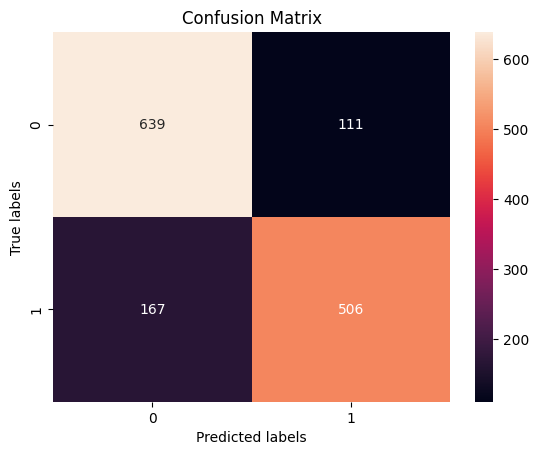

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(label, pred, labels=[0,1])

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [109]:
#load weights
path='saved_weights2.pt'
model.load_state_dict(torch.load(path));
model.eval();

#Instantiate the spacy
import spacy
nlp = spacy.load('en_core_web_sm')


In [125]:
def predict(model, sentence, word_dict, max_len=512):
    model.eval()
    
    tokens = [tok.text for tok in nlp(sentence)]
    unk_idx = word_dict["<unk>"]
    indexed = [word_dict.get(t, unk_idx) for t in tokens][:max_len]

    seq = torch.tensor(indexed, dtype=torch.long).unsqueeze(0)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    seq = seq.to(device)

    with torch.no_grad():
        output = model(seq)     # <-- only ONE argument
        pred = torch.argmax(output, dim=1).item()

    return pred


In [151]:
#Lets use it for predicting the model

x = predict(model, "how the #altright uses  &amp; insecurity to lure men into #whitesupremacy",word_dict)
print(x)

1


In [130]:
#load the csv file
df_test = pd.read_csv(r'twitter-hate-speech/test_tweets_anuFYb8.csv')

#Apply all the steps we did before training
df_test = df_test.drop(['id'], axis=1)
df_test['tweet'] = df_test['tweet'].apply((lambda x: review_to_words(x)))
df_test['tweet'] = df_test['tweet'].apply(lambda x : ' '.join(replace_words[word] if word in replace_words else word for word in x.split()))
df_test['tweet'] = df_test['tweet'].apply(lambda x: x.replace('user',''))

#print the dataframe
df_test.head()

,tweet
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone to see the n...
2,safe ways to heal your acne altwaystoheal heal...
3,is the hp and the cursed child book up for res...
4,3rd bihday to my amazing hilarious nephew eli ...


In [131]:
df_test.describe()

,tweet
count,17197
unique,16049
top,model i love u take with u all the time in ur
freq,170


In [164]:
#we will now make a list of predictions
label_test = [predict(model, df_test['tweet'][ind],word_dict) for ind in df_test.index]

print(label_test)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [165]:
#convert the list into the dataframe and assign it to column called label into the test dataframe
df_test['label'] = pd.DataFrame(label_test)

#display the results
df_test.head()

,tweet,label
0,studiolife aislife requires passion dedication...,0
1,white supremacists want everyone to see the n...,1
2,safe ways to heal your acne altwaystoheal heal...,0
3,is the hp and the cursed child book up for res...,1
4,3rd bihday to my amazing hilarious nephew eli ...,0


In [147]:
#write the file into the csv
df_test.to_csv(r'twitter-hate-speech/test_results.csv')

label
0    14281
1     2916
Name: count, dtype: int64


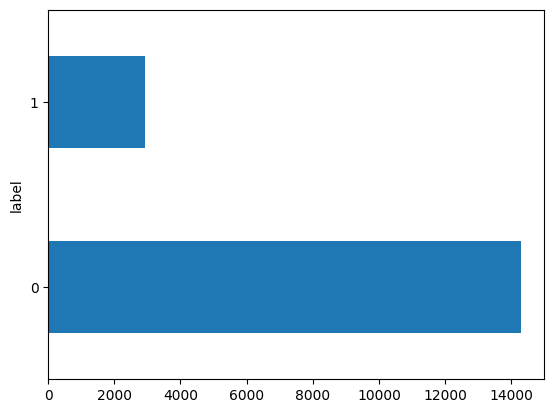

In [148]:
#a simple visualization to show the prediction
df_test.label.value_counts().plot(kind='barh')
print(df_test.label.value_counts())